# Lead Score Case Study

# Problem Statement
X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.

Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%

# Business Goal
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Importing all the necessary python libraries/modules

In [1]:
#importing libraries/modules

# for data preparation and reading
import pandas as pd
import numpy as np

#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#importing warning filter to avoid warning alerts
import warnings
warnings.filterwarnings("ignore")

#### Reading the data to dataframe 'lead_data' using pandas

In [2]:
# reading Leads data to dataframe 'lead_data'
lead_data=pd.read_csv('Leads.csv')

In [3]:
#loading first five rows to make sure data is loaded correctly
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#loading last five rows to verify if data is loaded correctly
lead_data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


##### By viewing head and tail above it was noted that there are no extra rows, summary rows, subtotals etc. So no need to use skiprows & skipfooter parameters while reading data

## Data Inspection

In [5]:
# Checking number of rows and columns of dataframe lead_data
lead_data.shape

(9240, 37)

There are 9,240 rows and 37 columns

In [6]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###### we can see that there are missing values present in our data

In [7]:
#Viewing statistical information of numerical columns using describe()
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

##### 1)Handling the 'Select' level that is present in many of the categorical variables.
We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [8]:
# Converting 'Select' values to nan
lead_data=lead_data.replace('Select',np.nan)

##### 2) Dealing with null values in columns

In [9]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Finding the null percentages across columns
round(lead_data.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40%

In [11]:
#Drop columns which are having null values greater than 40%
for col in lead_data.columns:
    if lead_data[col].isnull().mean()*100>40:
        lead_data.drop(col,axis=1,inplace=True)

In [12]:
# Looking at percentage of null values after removing few columns (>40% missing values)
round(lead_data.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

######  Imputing null values in other columns

In [13]:
#creating function for countplot from sns

def plot_countplot(x_index):
    plt.figure(figsize=(17,5))
    sns.countplot(x=x_index,data=lead_data)
    plt.xticks(rotation=90)
    plt.plot()

###### 1) Country 
This column has 27% missing values

In [14]:
# looking of number of prospects from each country
lead_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

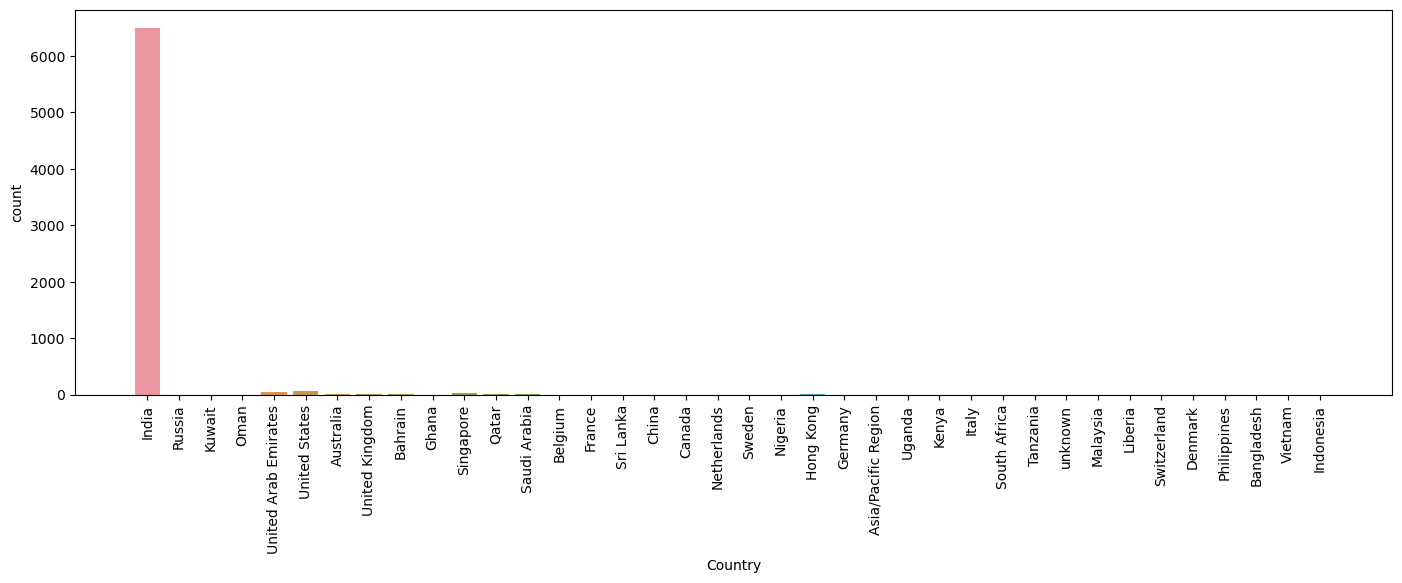

In [15]:
# Plotting the Country column using defined function
plot_countplot('Country')

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [16]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

###### 2) Specialization                                   
This column has 37% null values

In [17]:
# looking of count for each Specialization
lead_data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

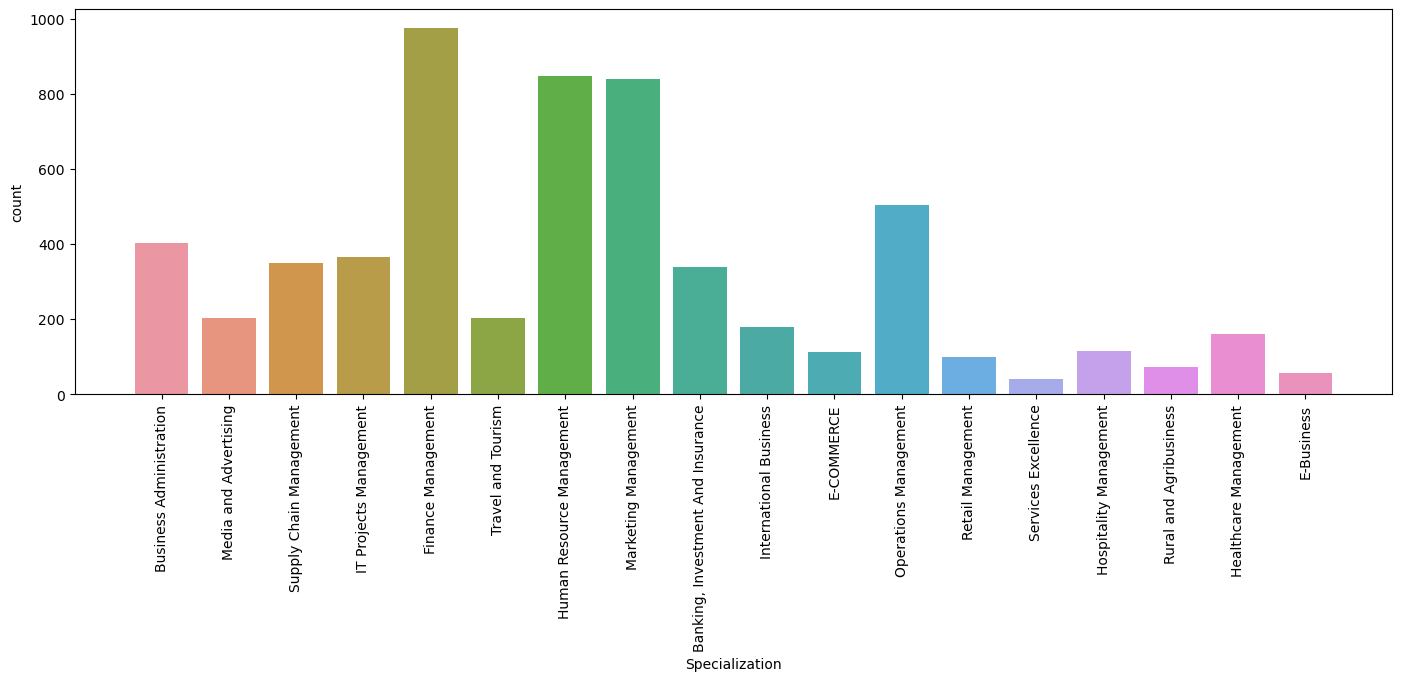

In [18]:
# Plotting the Specialization column using defined function
plot_countplot('Specialization')

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [19]:
# Creating a separate category called 'Others' for this
lead_data['Specialization']=lead_data['Specialization'].replace(np.nan,'Others')

###### 3) What is your current occupation
This column has 29% null values

In [20]:
# looking of count for What is your current occupation
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

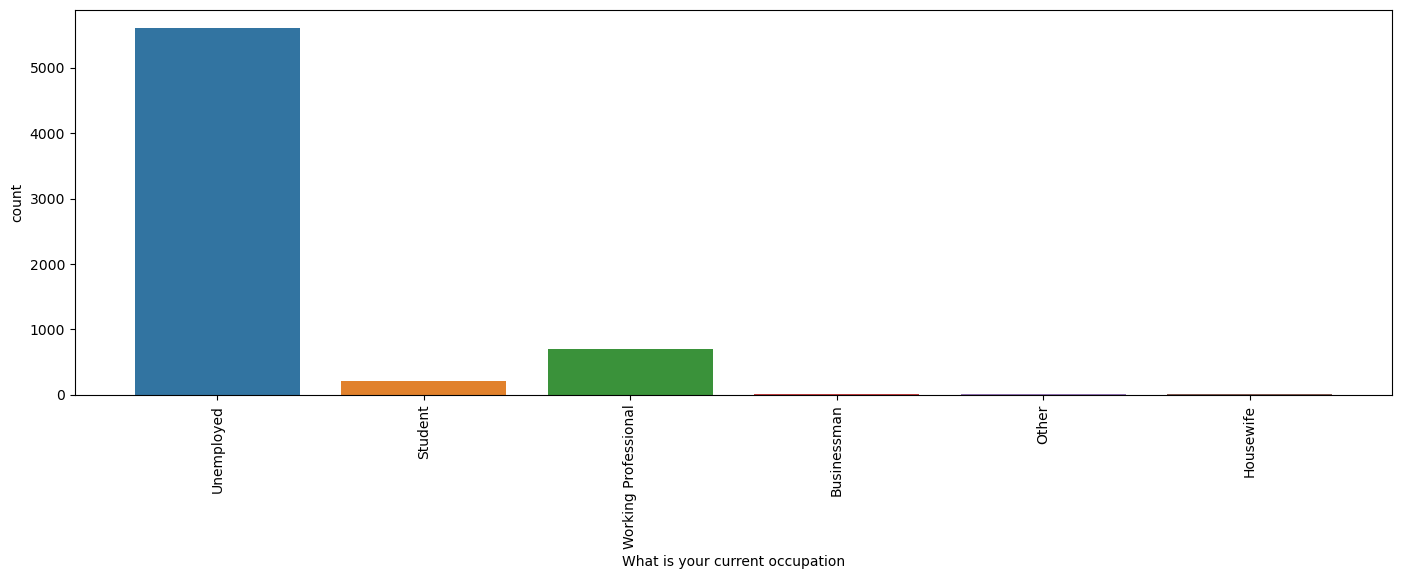

In [21]:
# Plotting the What is your current occupation column using defined function
plot_countplot('What is your current occupation')

Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [22]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

###### 4) What matters most to you in choosing a course
This column has 29% null values

In [23]:
# looking of count for 'What matters most to you in choosing a course'
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

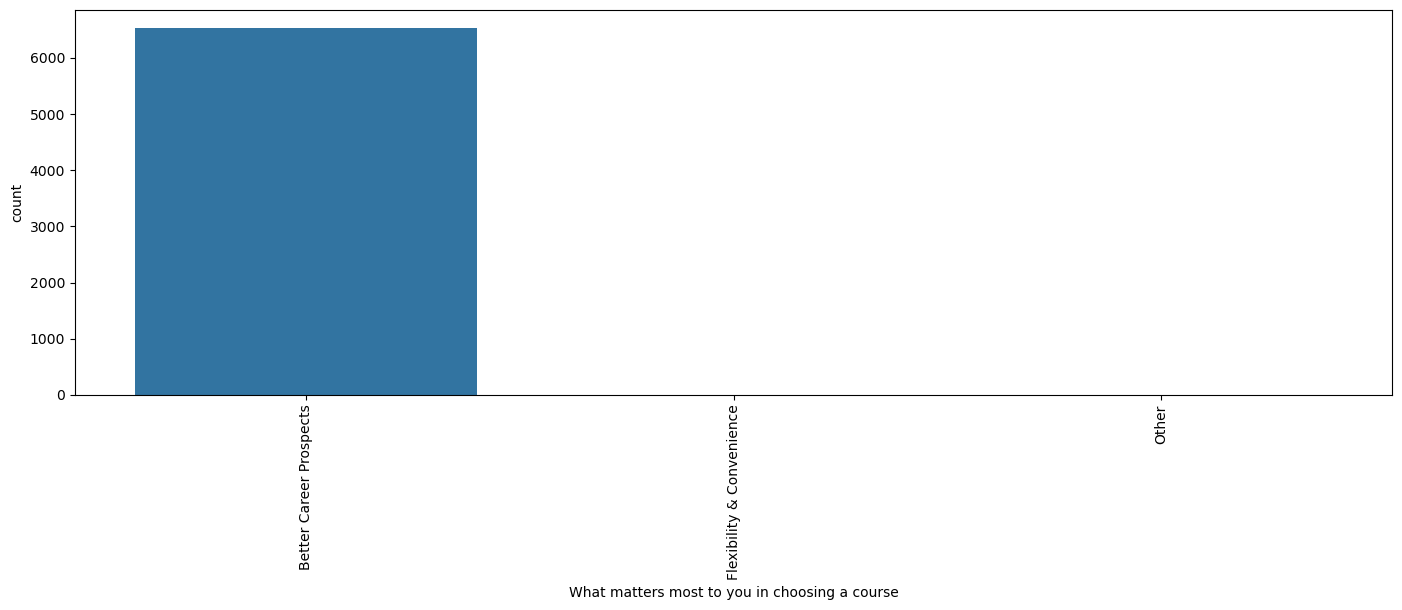

In [24]:
# Plotting the 'What matters most to you in choosing a course' column using defined function
plot_countplot('What matters most to you in choosing a course')

We can see that this is highly skewed column so we can remove this column.

In [25]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

###### 5) Tags
This column has 36% null values

In [26]:
# looking of count for Tags
lead_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

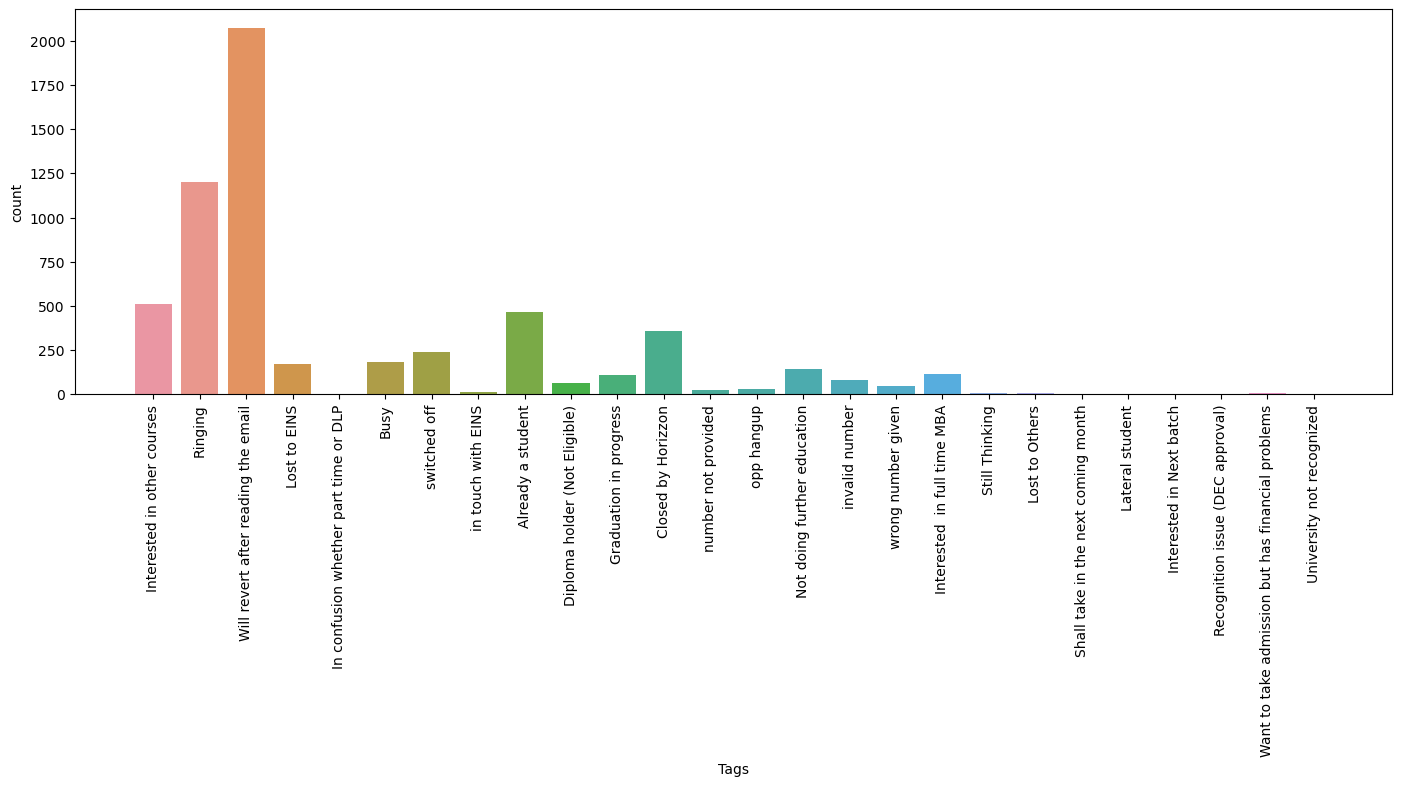

In [27]:
# Plotting the Tags column using defined function
plot_countplot('Tags')

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value

In [28]:
# Imputing the missing data in the tags column with 'Will revert after reading the email
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

###### 6) City
This cloumn has 40% null values

In [29]:
# looking of count for each City
lead_data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

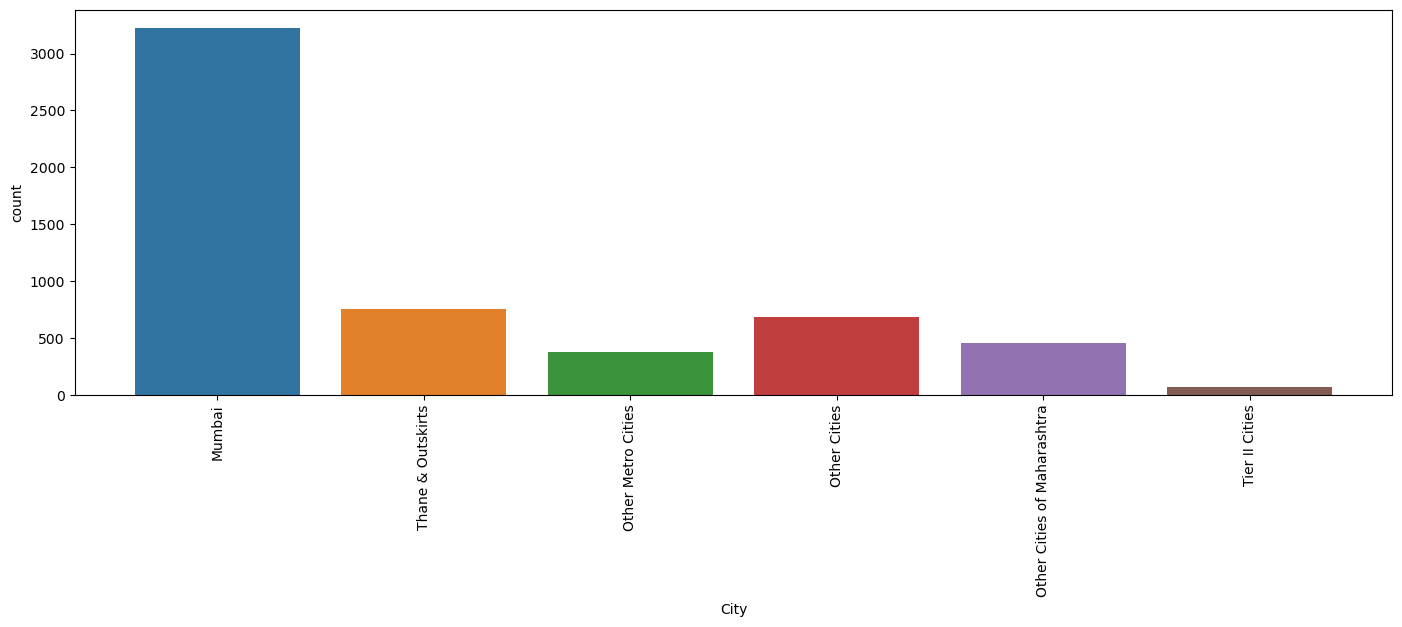

In [30]:
# Plotting the City column using defined function
plot_countplot('City')

Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [31]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

###### Rest missing values are under 2% so we can drop these rows.

In [32]:
# Percentage of null values
round(lead_data.isnull().mean()*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [33]:
# Removing rows from lead_data dataframe that contains missing values
lead_data = lead_data.dropna(how='any',axis=0)

In [34]:
# calculating null values percentage again to make sure there are no null values
round(lead_data.isnull().mean()*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset.

###### We can find the percentage of rows retained.

In [35]:
# Percentage of rows retained 
#initial row count was 9240
round((len(lead_data.index)/9240)*100,2)

98.2

We have retained 98.2% of the rows after cleaning the data .

## Exploratory Data Anaysis

###### Checking for duplicates

In [36]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


no duplicate records in our lead dataset

In [37]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [38]:
round(lead_data['Converted'].mean()*100,2)

37.86

The lead conversion rate is 37.86%.

## Univariate and Bivariate Analysis

In [39]:
# Creating a function for countplot from sns
def CountPlot_Analysis(x_index):
    plt.figure(figsize=(12,5))
    ax=sns.countplot(x = x_index, hue = "Converted", data = lead_data,palette='Set2')
    for label in ax.containers:
        ax.bar_label(label)
    plt.xticks(rotation = 75)
    plt.plot()

In [40]:
# Creating a function for boxplot from sns
def BoxPlot_Analysis(x_index):
    sns.boxplot(lead_data[x_index],orient='vert')
    plt.plot()

###### 1) Lead Origin

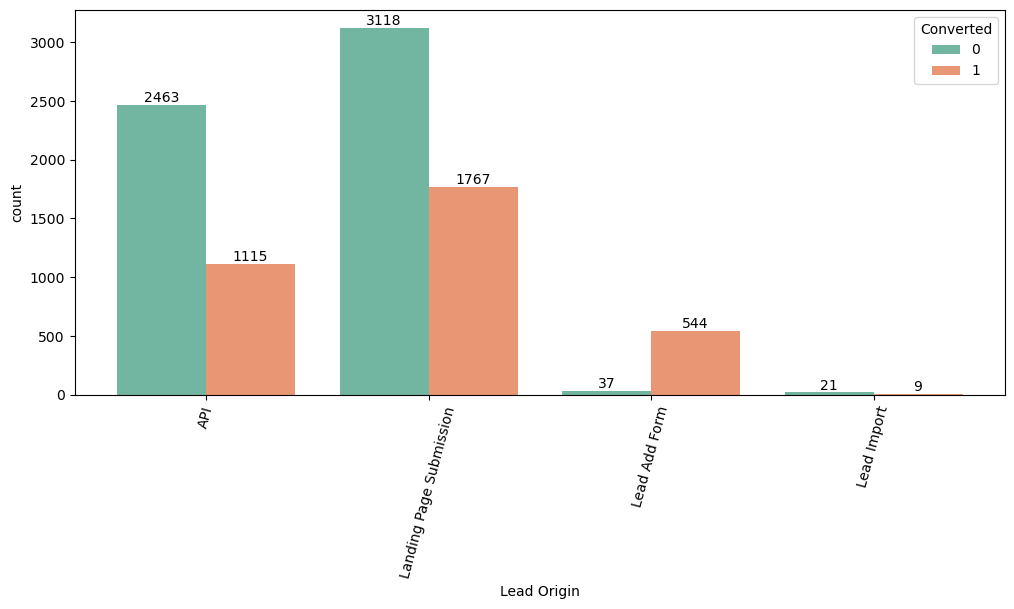

In [41]:
CountPlot_Analysis('Lead Origin')

###### Inference :
Leads originating from API and Landing Page Submission are considerable high but their conversion rate is low.

Although the number of leads from 'Lead Add Form' are less, their conversion rate is high.

Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

###### 2) Lead Source

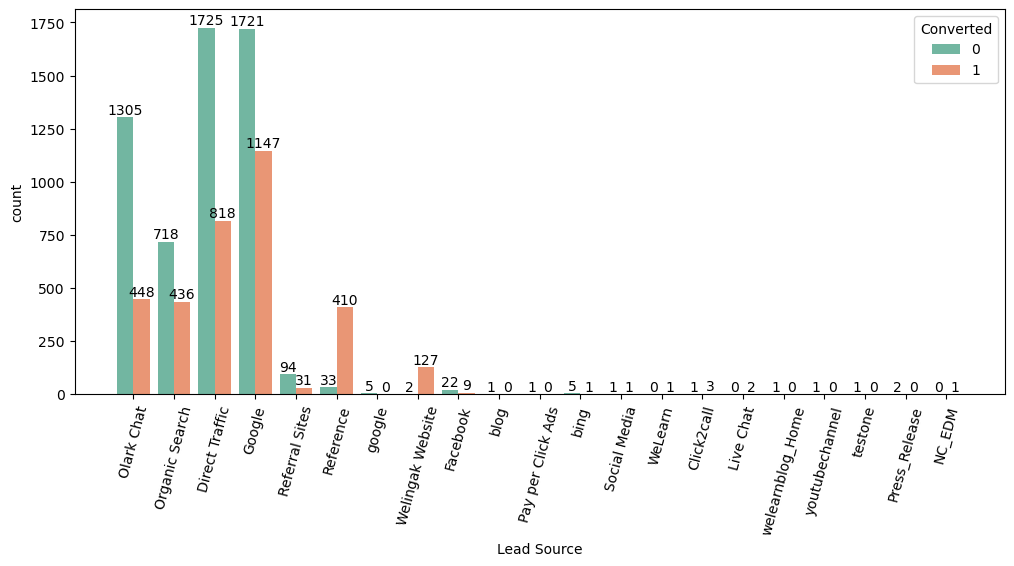

In [42]:
CountPlot_Analysis('Lead Source')

In [43]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [44]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

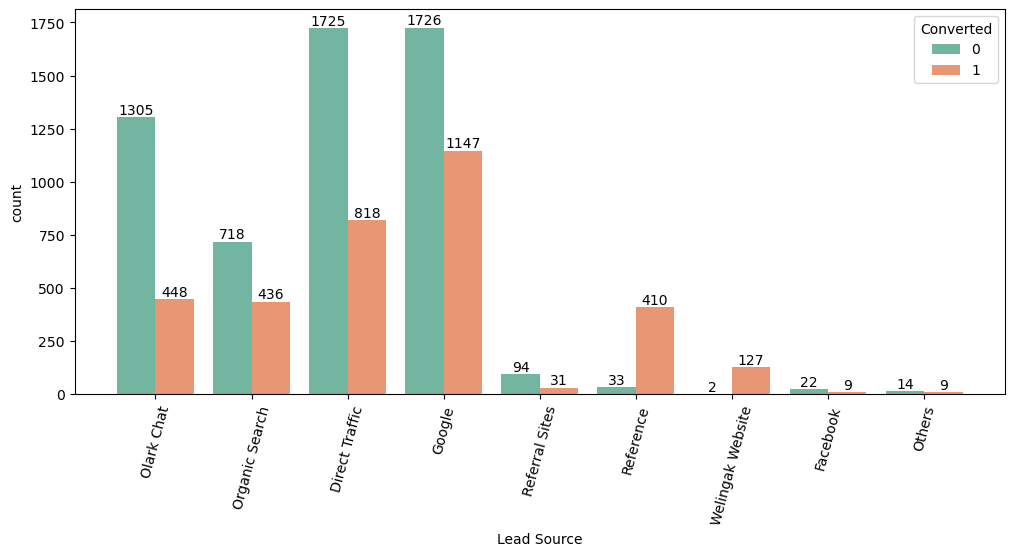

In [45]:
# Visualizing again
CountPlot_Analysis('Lead Source')

###### Inference
Google and Direct traffic generates maximum number of leads.

Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

###### 3) Do Not Email

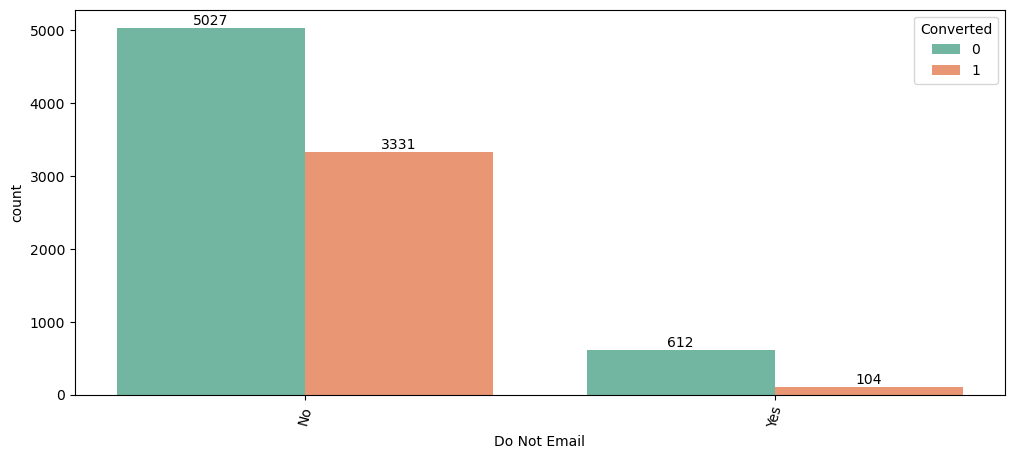

In [46]:
CountPlot_Analysis('Do Not Email')

###### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

###### 4) Do Not Call

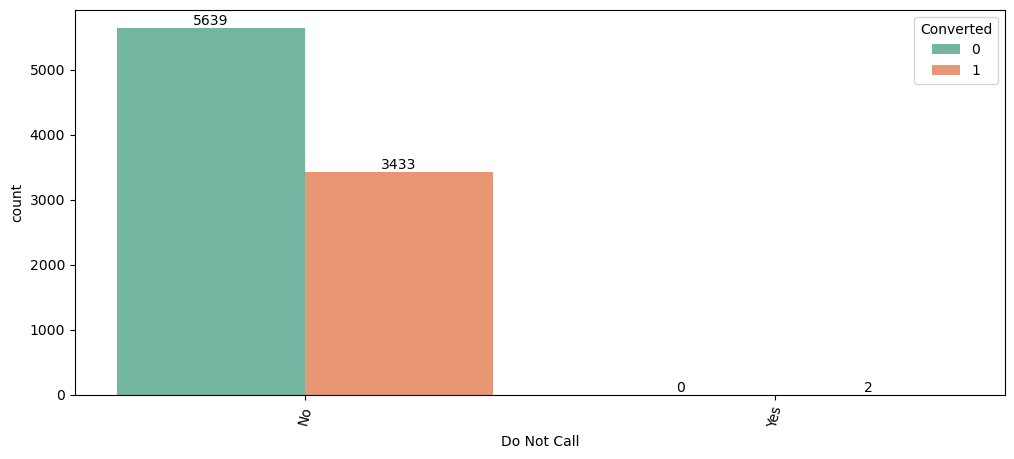

In [47]:
CountPlot_Analysis('Do Not Call')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

###### 5) TotalVisits

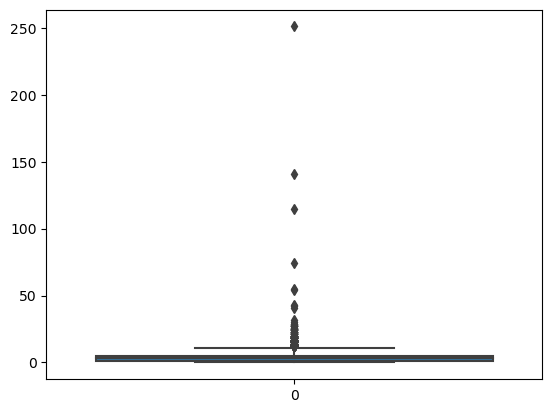

In [48]:
BoxPlot_Analysis('TotalVisits')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis

In [49]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

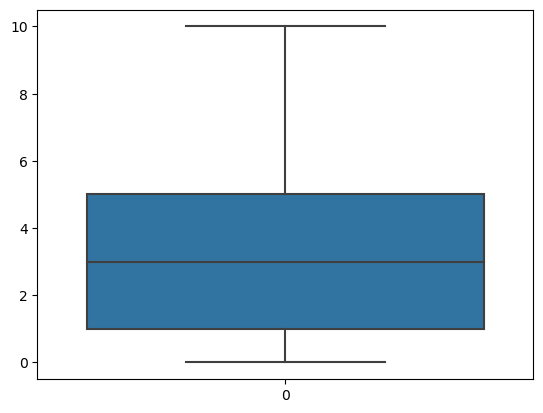

In [50]:
#visualizing
BoxPlot_Analysis('TotalVisits')

[]

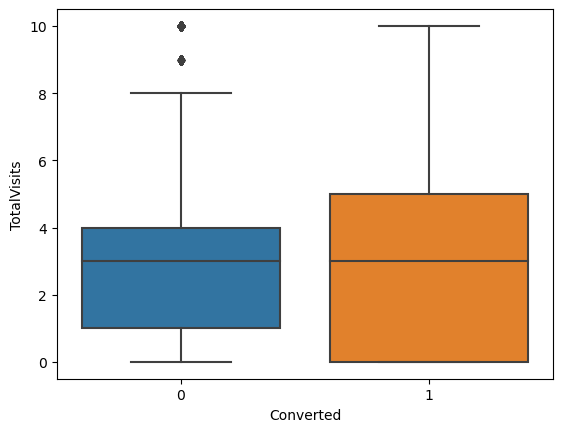

In [51]:
# Boxplot of TotalVisits w.r.t Converted
sns.boxplot(x='Converted',y='TotalVisits',data=lead_data)
plt.plot()

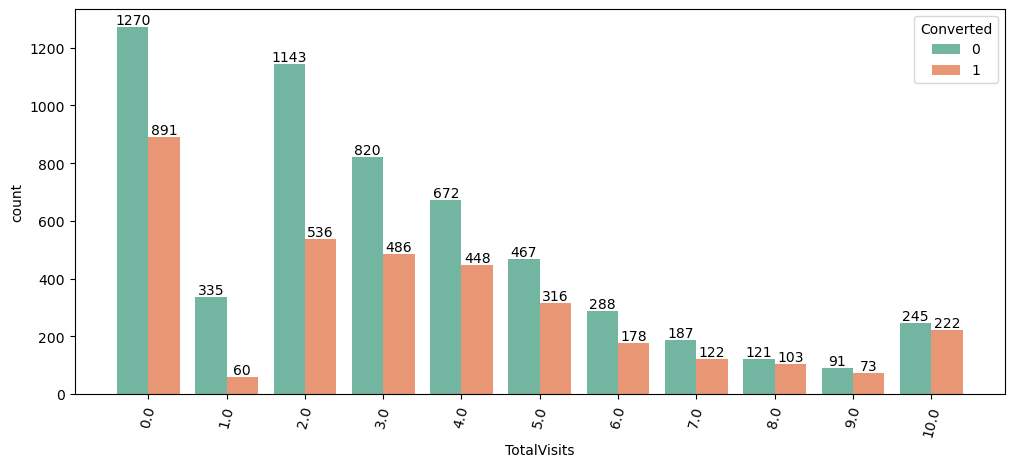

In [52]:
CountPlot_Analysis('TotalVisits')

###### Inference
Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

###### 6) Total Time Spent on Website


In [53]:
# checking statistical information of column 'Total Time Spent on Website'
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

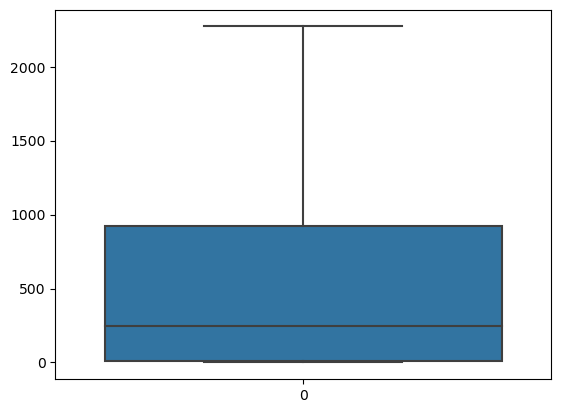

In [54]:
#Boxplot for 'Total Time Spent on Website'
BoxPlot_Analysis('Total Time Spent on Website')

[]

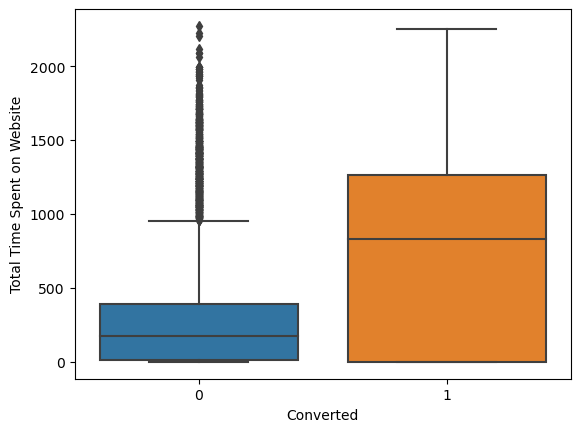

In [55]:
sns.boxplot(x='Converted',y='Total Time Spent on Website',data=lead_data)
plt.plot()

###### Inference
Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time.

###### 7) Page Views Per Visit

In [56]:
# checking statistical information of column 'Page Views Per Visit'
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

There are outliers

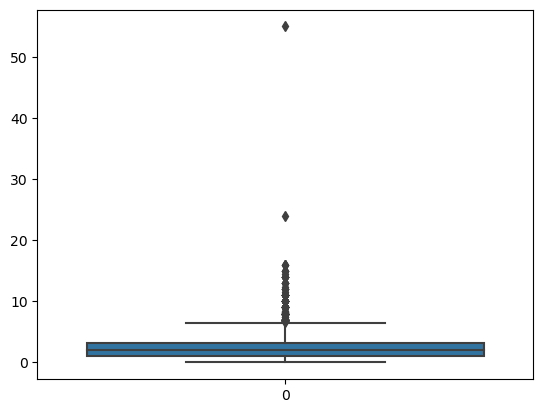

In [57]:
# boxplot of 'Page Views Per Visit'
BoxPlot_Analysis('Page Views Per Visit')

We will cap the outliers to 95% value for analysis.

In [58]:
percentiles=lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit']<=percentiles[0]]=percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit']>=percentiles[1]]=percentiles[1]

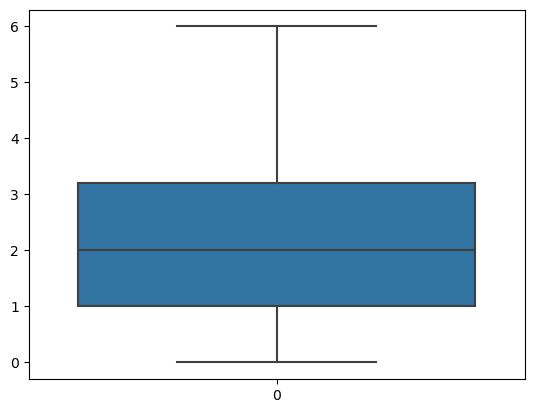

In [59]:
#visualizing
BoxPlot_Analysis('Page Views Per Visit')

[]

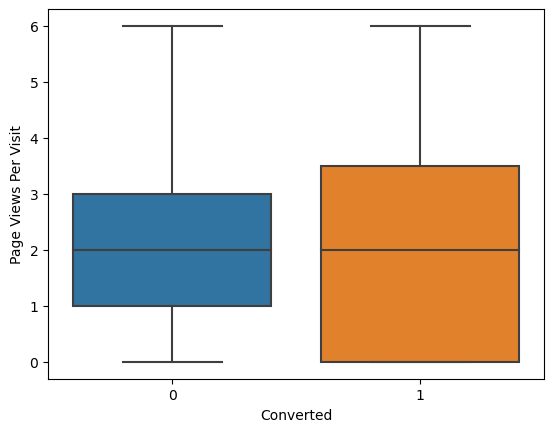

In [60]:
sns.boxplot(x='Converted',y='Page Views Per Visit',data=lead_data)
plt.plot()

###### Inference
Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

###### 8) Last Activity

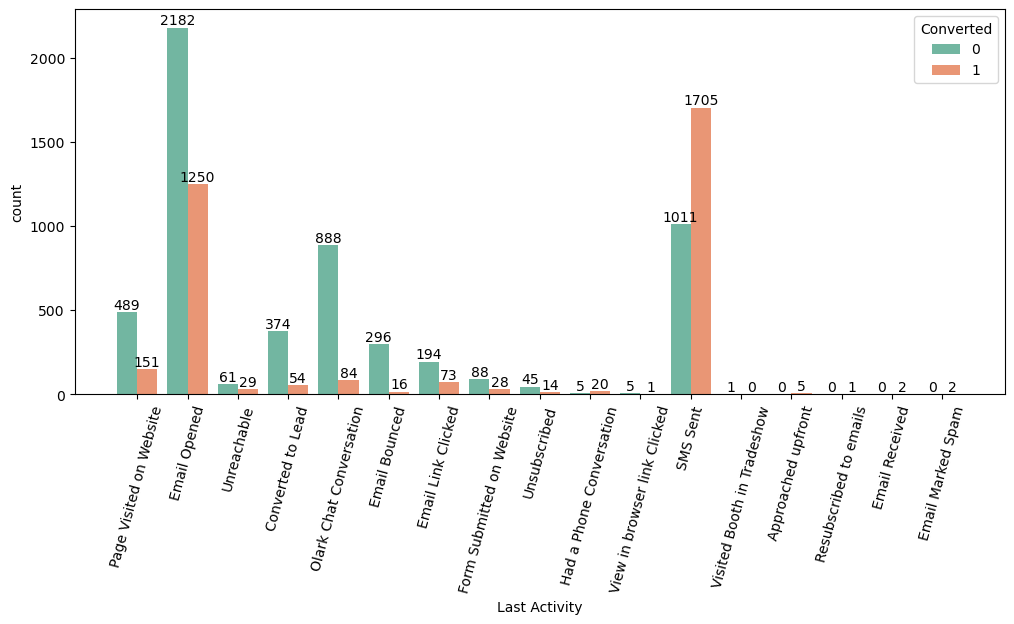

In [61]:
# plotting column 'Last Activity'
CountPlot_Analysis('Last Activity')

We could club those last activities which are having less data

In [62]:
lead_data['Last Activity']=lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],'Other_Activity')

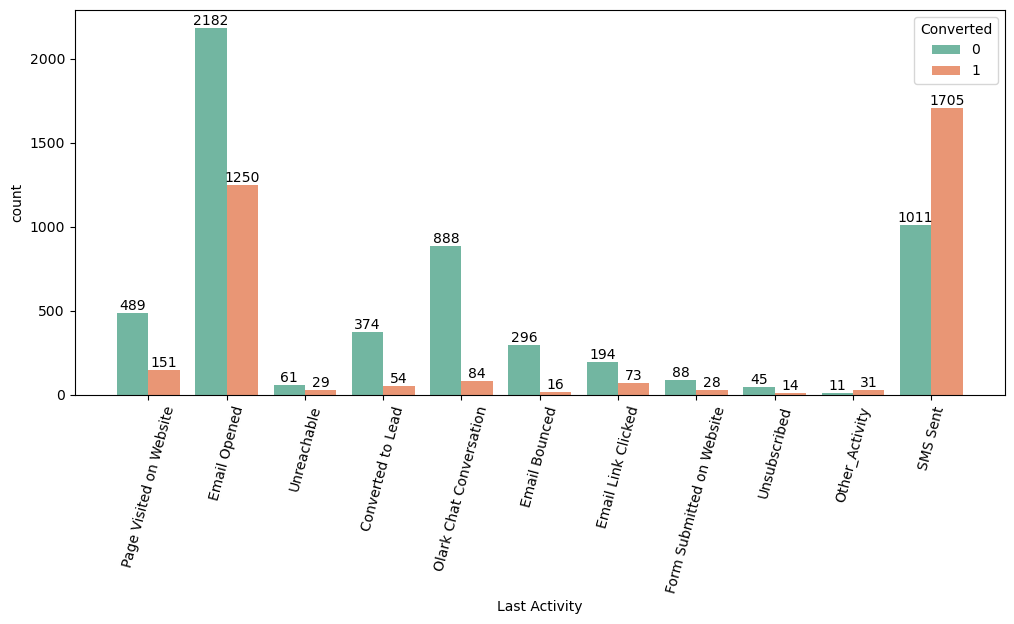

In [63]:
#Visualize again
CountPlot_Analysis('Last Activity')

###### Inference
Most of the lead have their Email opened as their last activity.

Conversion rate for leads with last activity as SMS Sent is the most

###### 9) Country

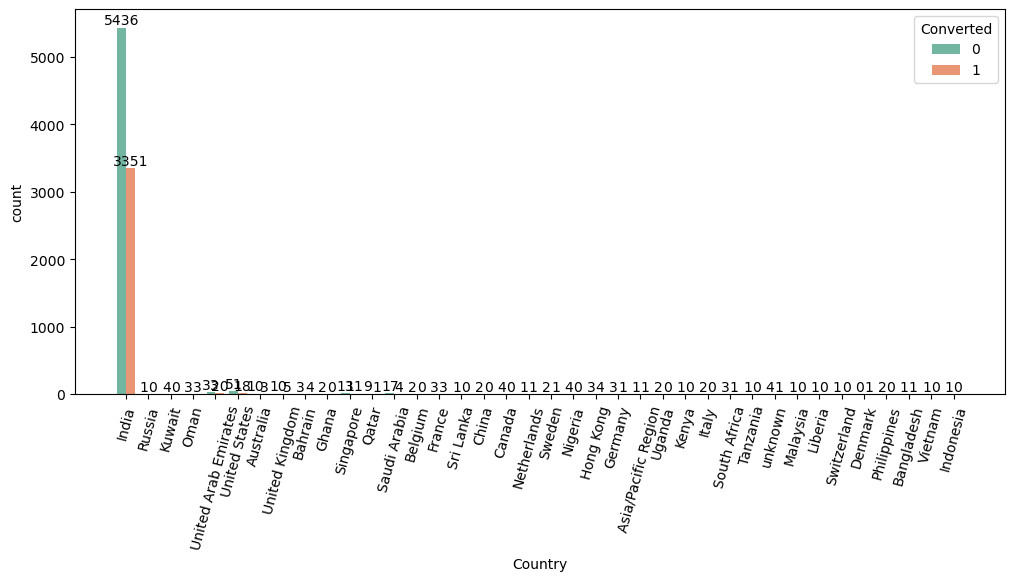

In [64]:
CountPlot_Analysis('Country')

###### Inference
Most leads are from 'India'

We could club all those countries with low count(<10) to another column 'Other Countries'

In [65]:
# Finding countries which have count <10
vc=lead_data.groupby('Country')['Country'].count()<10

In [66]:
# Replace the above countries as "Other Countries"
keys = []
for key, value in vc.items():
    if value is True:
        keys.append(key)
lead_data['Country']=lead_data['Country'].replace(keys,'Other Countries')

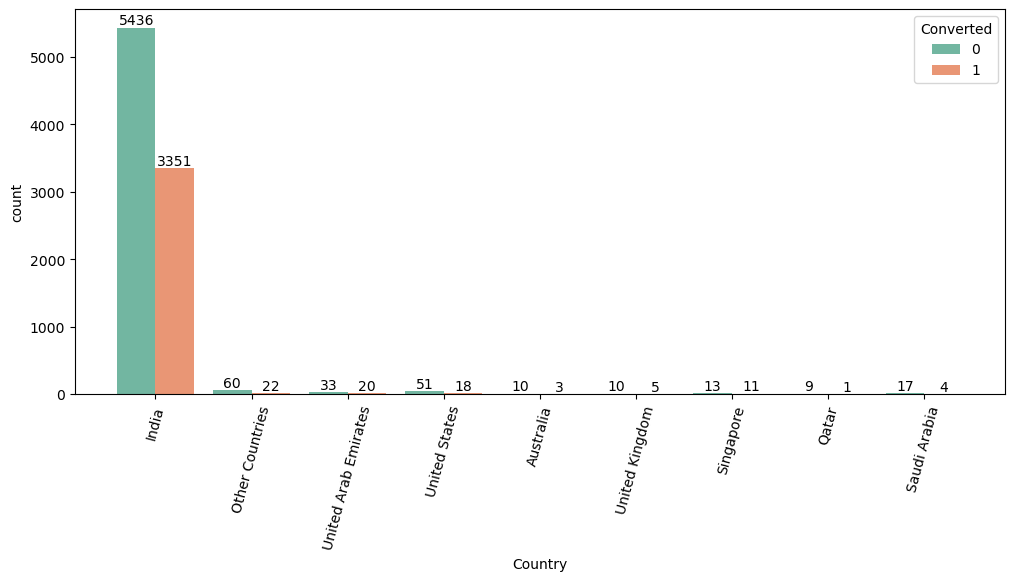

In [67]:
#visualize again
CountPlot_Analysis('Country')

###### 10)Specialization

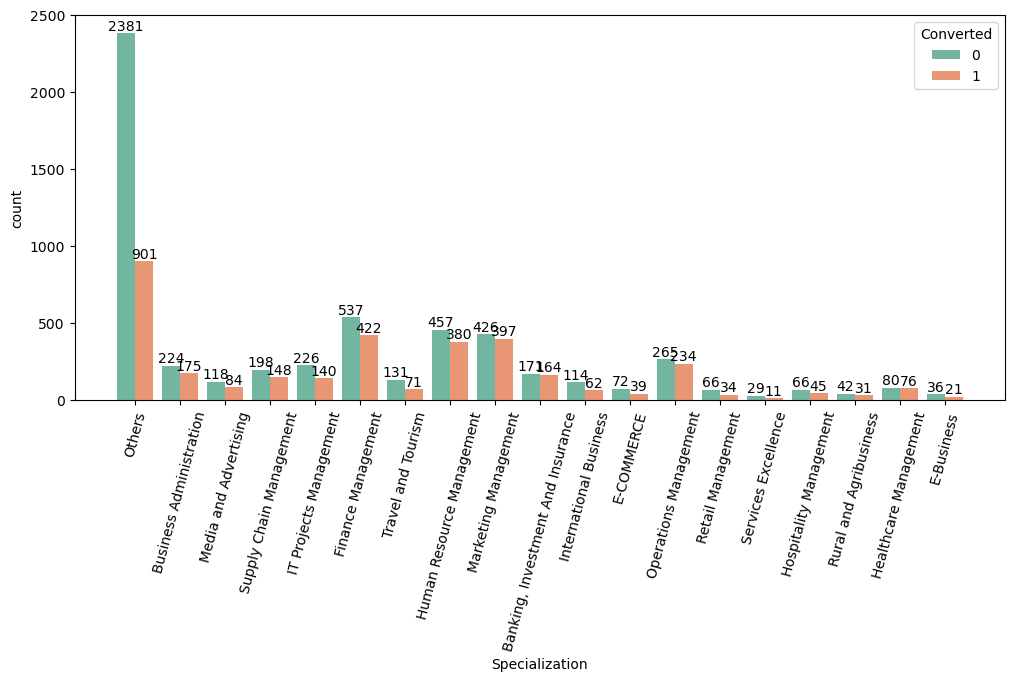

In [68]:
CountPlot_Analysis('Specialization')

In [69]:
# Looking at counts of column 'Specialization'
lead_data['Specialization'].value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

###### Inference
Focus should be more on the Specialization with high conversion rate.

###### 11) What is your current occupation

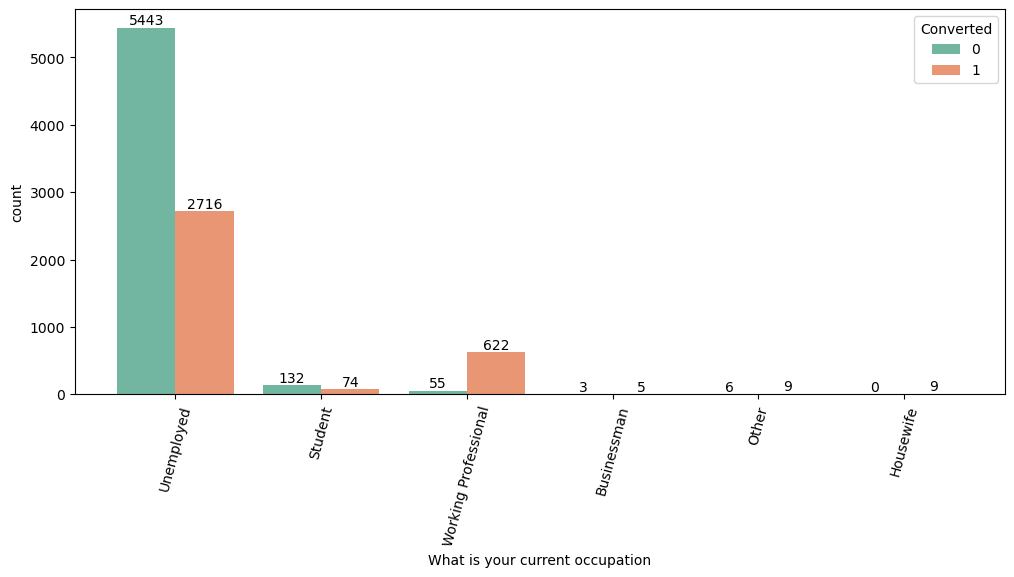

In [70]:
CountPlot_Analysis('What is your current occupation')

###### Inference
Working Professionals going for the course have high chances of joining it.

Unemployed leads are the most in numbers but has around 30-35% conversion rate.

###### 12) Search

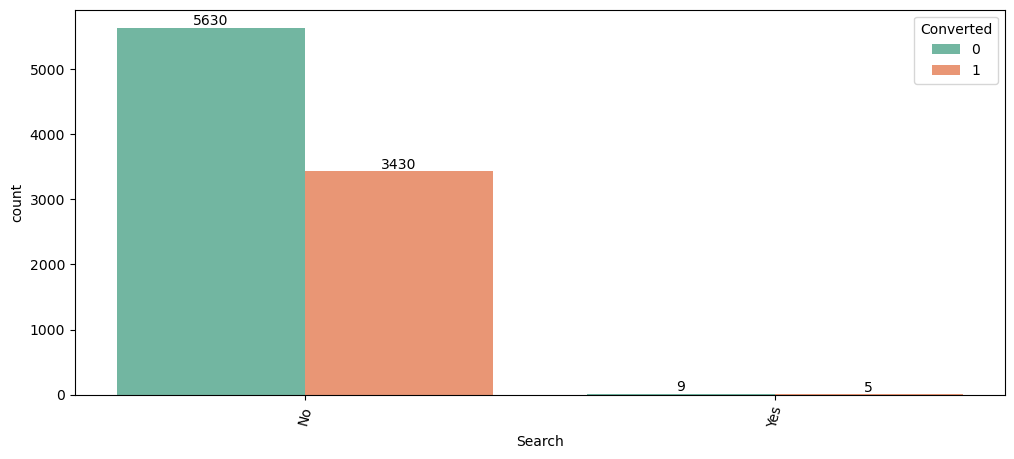

In [71]:
CountPlot_Analysis('Search')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [72]:
lead_data=lead_data.drop('Search',axis=1)

###### 13) Magazine

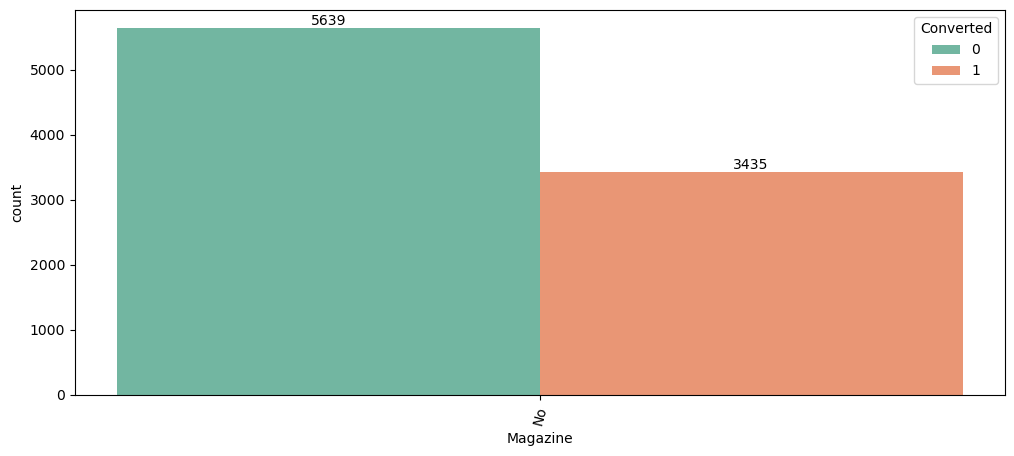

In [73]:
CountPlot_Analysis('Magazine')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [74]:
lead_data=lead_data.drop('Magazine',axis=1)

###### 14) Newspaper Article

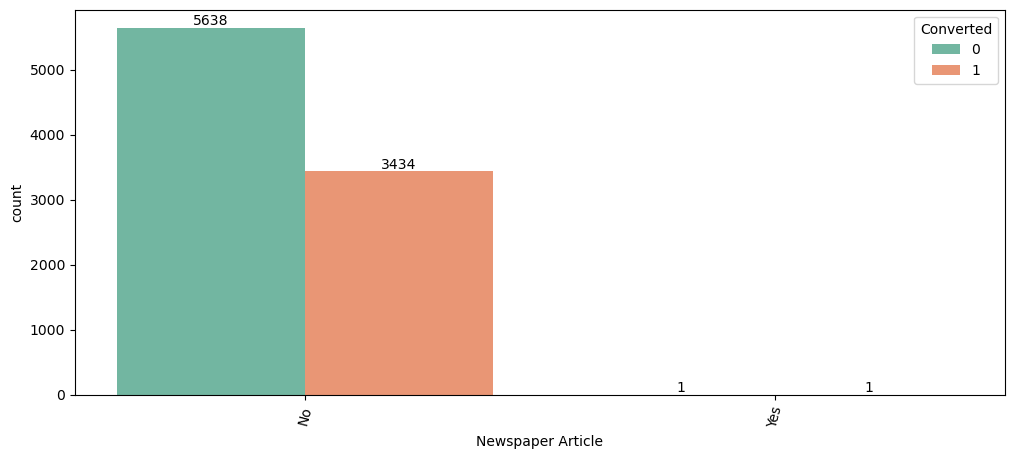

In [75]:
CountPlot_Analysis('Newspaper Article')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [76]:
lead_data=lead_data.drop('Newspaper Article',axis=1)

###### 15) X Education Forums

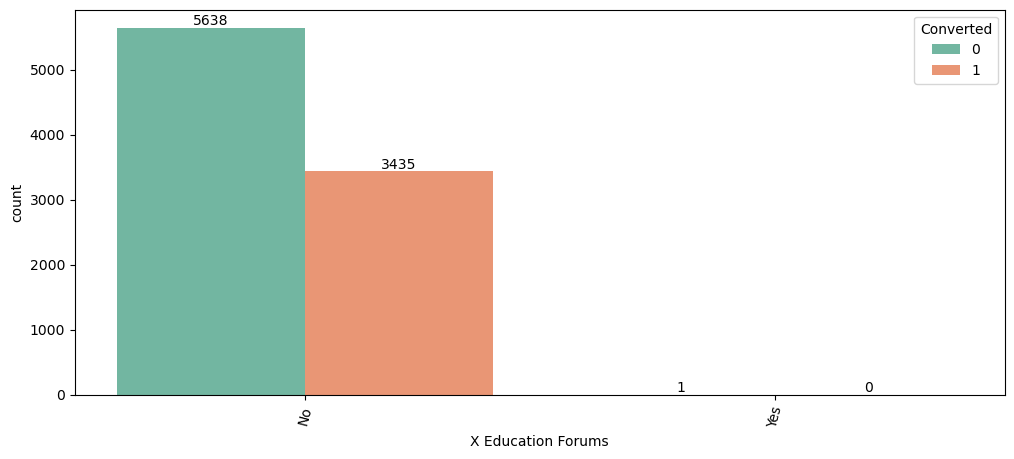

In [77]:
CountPlot_Analysis('X Education Forums')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [78]:
lead_data=lead_data.drop('X Education Forums',axis=1)

###### 16) Newspaper

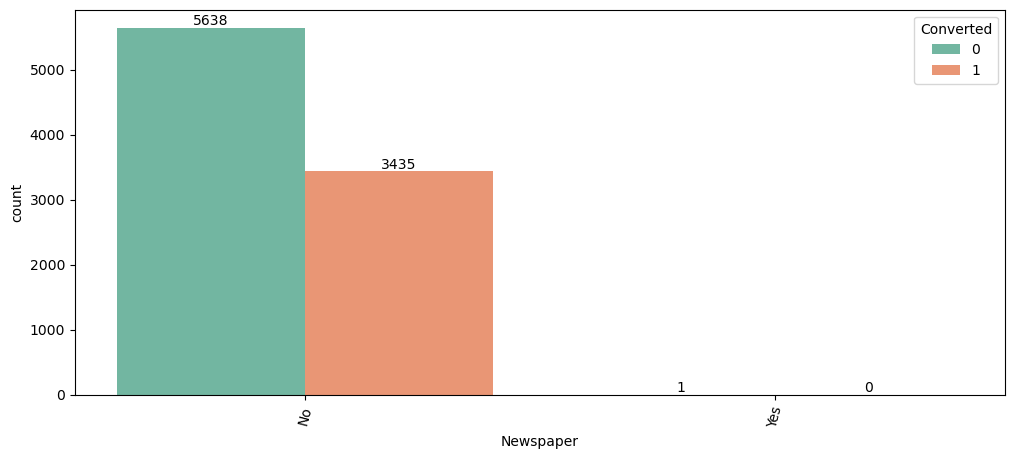

In [79]:
CountPlot_Analysis('Newspaper')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [80]:
lead_data=lead_data.drop('Newspaper',axis=1)

###### 17) Digital Advertisement

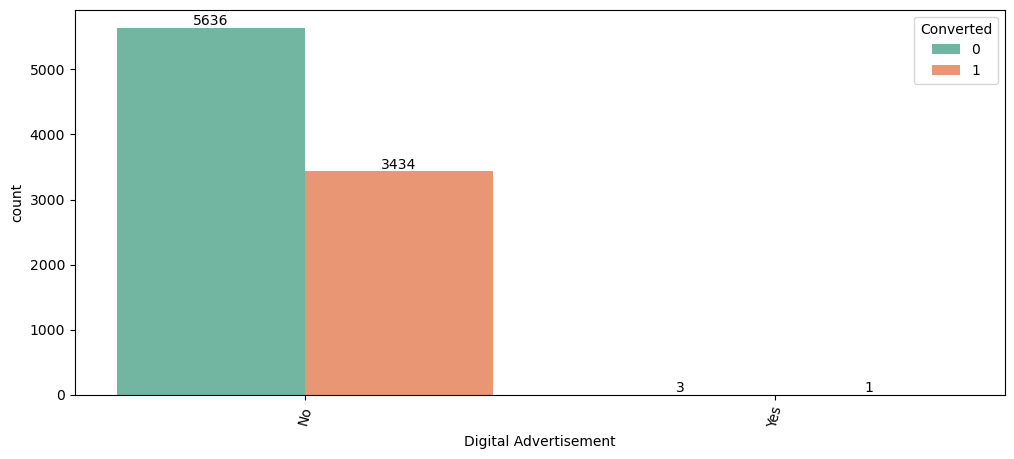

In [81]:
CountPlot_Analysis('Digital Advertisement')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [82]:
lead_data=lead_data.drop('Digital Advertisement',axis=1)

###### 18) Through Recommendations

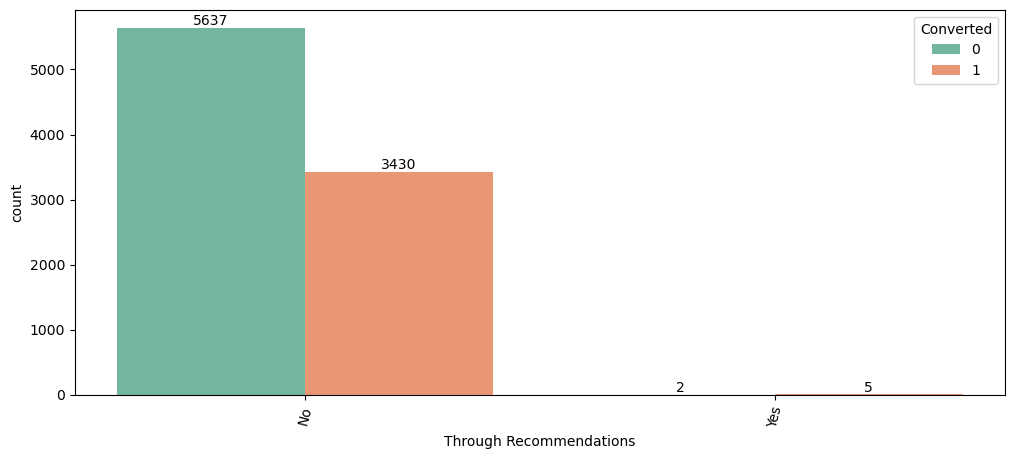

In [83]:
CountPlot_Analysis('Through Recommendations')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [84]:
lead_data=lead_data.drop('Through Recommendations',axis=1)

###### 19) Receive More Updates About Our Courses

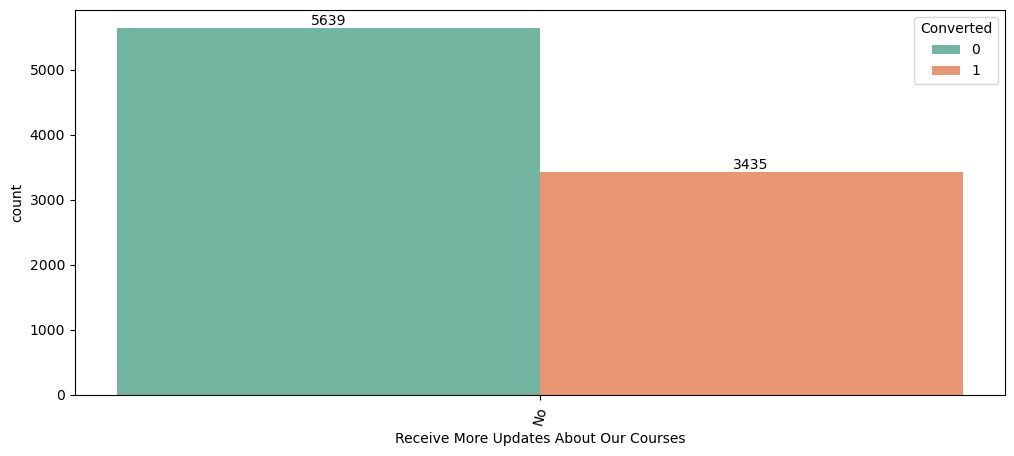

In [85]:
CountPlot_Analysis('Receive More Updates About Our Courses')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [86]:
lead_data=lead_data.drop('Receive More Updates About Our Courses',axis=1)

###### 20) Tags

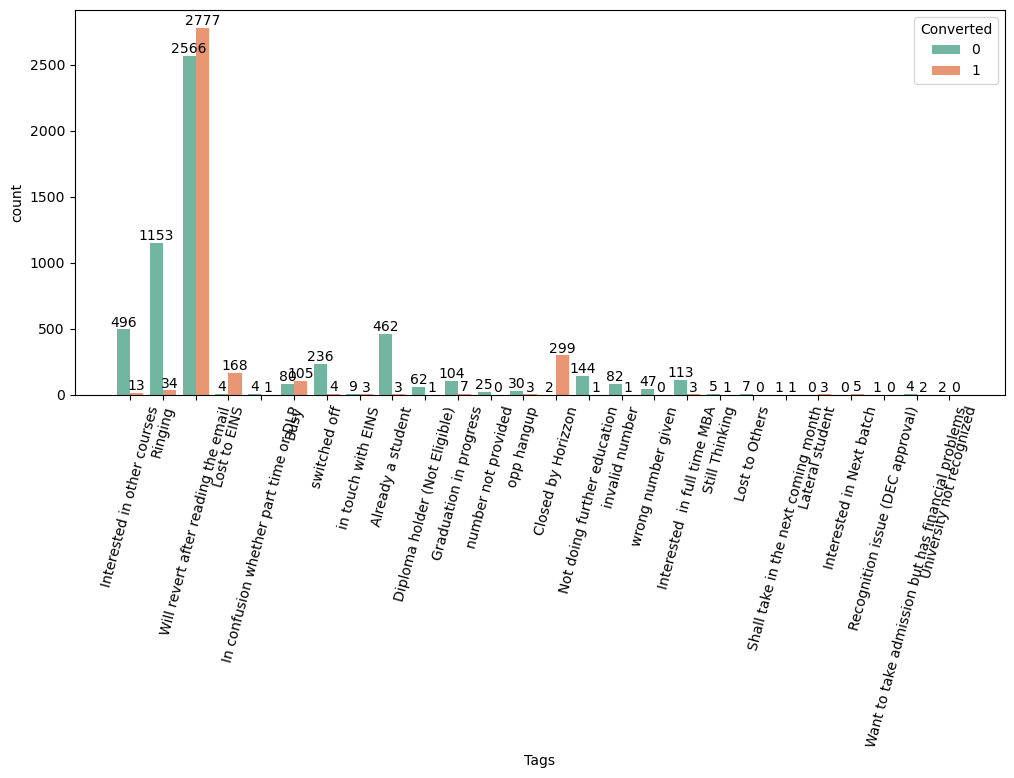

In [87]:
CountPlot_Analysis('Tags')

###### Inference
Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.



###### 21) Update me on Supply Chain Content

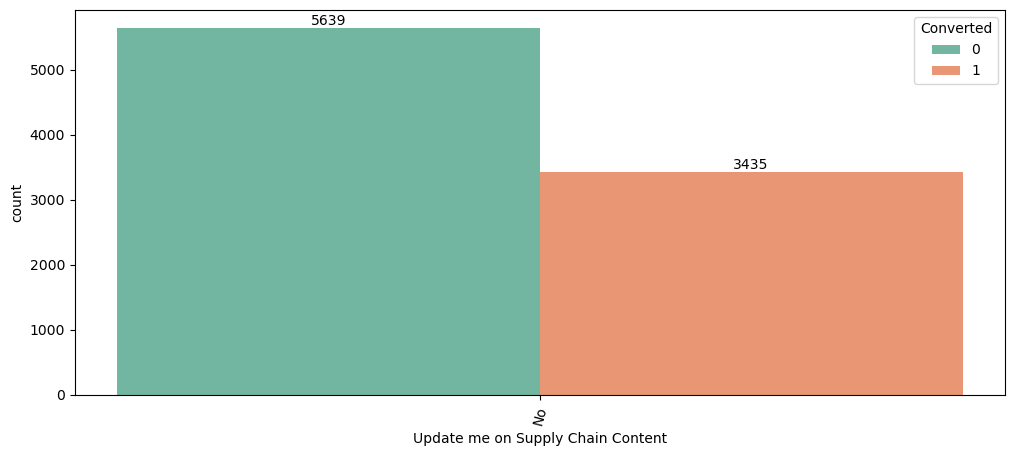

In [88]:
CountPlot_Analysis('Update me on Supply Chain Content')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [89]:
lead_data=lead_data.drop('Update me on Supply Chain Content',axis=1)

###### 22) Get updates on DM Content

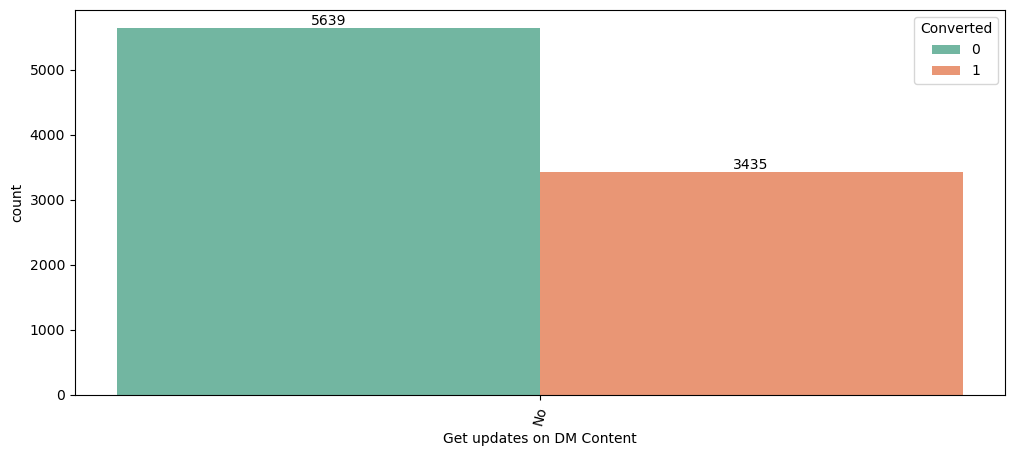

In [90]:
CountPlot_Analysis('Get updates on DM Content')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [91]:
lead_data=lead_data.drop('Get updates on DM Content',axis=1)

###### 23) City

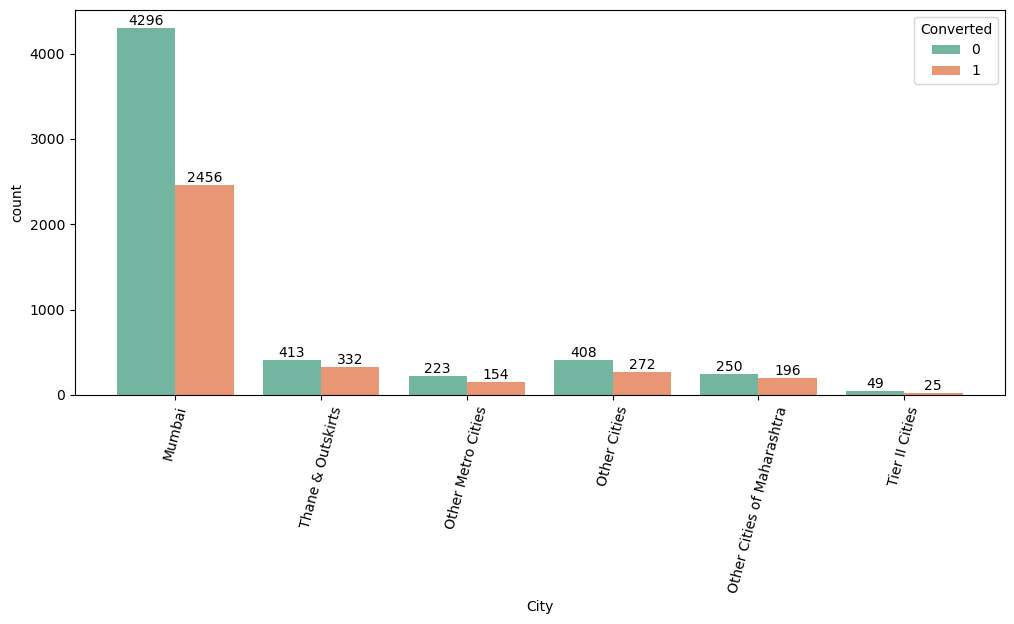

In [92]:
CountPlot_Analysis('City')

###### Inference
Most leads are from mumbai with around 50% conversion rate.

###### 24) I agree to pay the amount through cheque

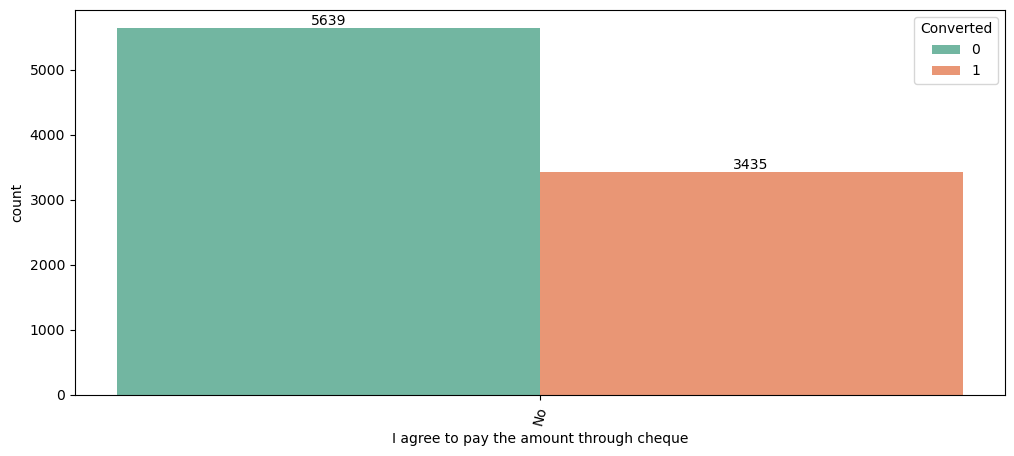

In [93]:
CountPlot_Analysis('I agree to pay the amount through cheque')

###### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

So delete this column

In [94]:
lead_data=lead_data.drop('I agree to pay the amount through cheque',axis=1)

###### 25) A free copy of Mastering The Interview

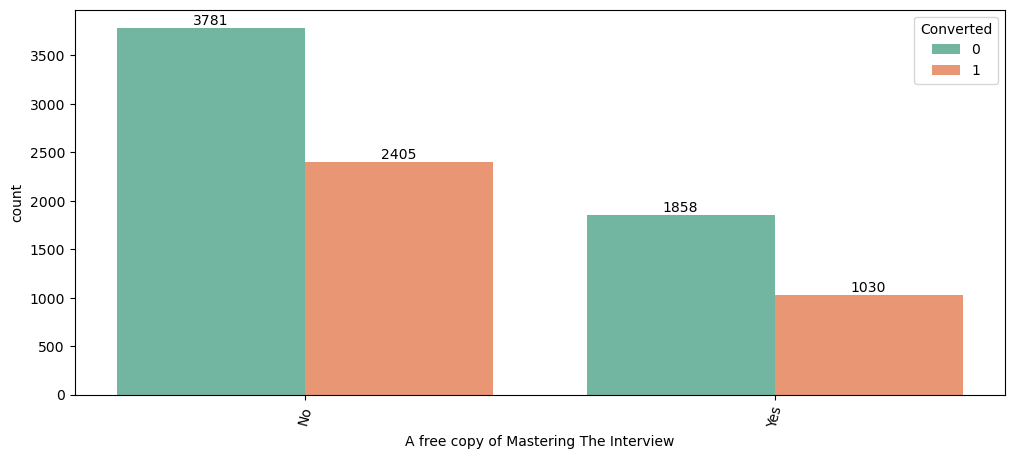

In [95]:
CountPlot_Analysis('A free copy of Mastering The Interview')

###### Inference
No Inference can be drawn with this parameter.

So delete this column

In [96]:
lead_data=lead_data.drop('A free copy of Mastering The Interview',axis=1)

###### 26) Last Notable Activity

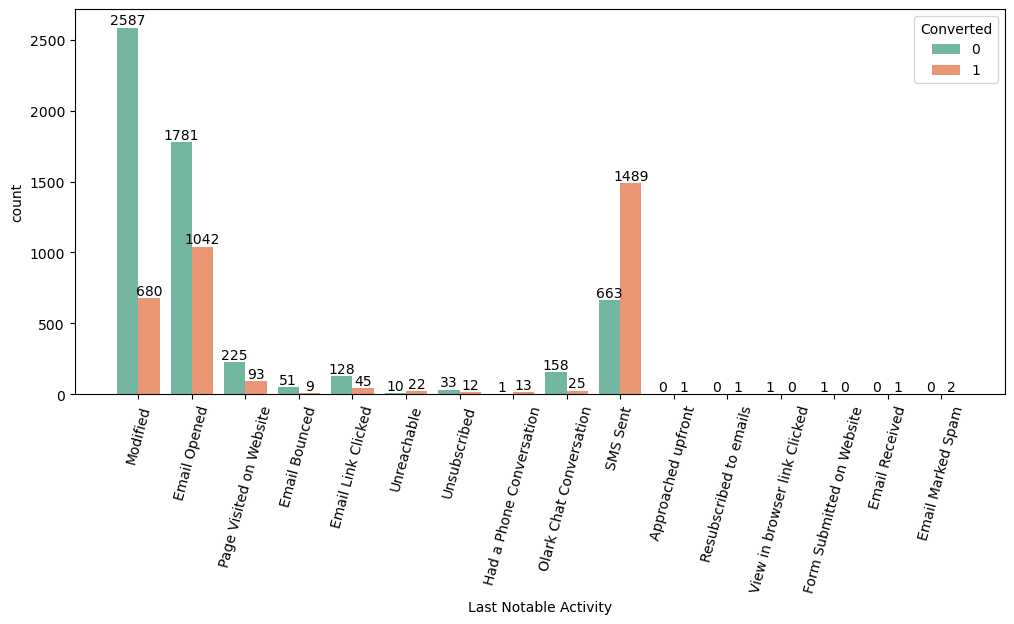

In [97]:
CountPlot_Analysis('Last Notable Activity')

###### Inference
Conversion rate for leads whose last notable Activity was 'SMS Sent' seemd to be high

In [98]:
# looking at shape of Dataframe
lead_data.shape

(9074, 17)

In [99]:
#looking at first 5 rows of dataframe
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Mumbai,Modified


###### Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [100]:
lead_data = lead_data.drop(['Lead Number','Tags','Country'],axis=1)

In [101]:
lead_data.shape

(9074, 14)

In [102]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## Multivariate Analysis

<Axes: >

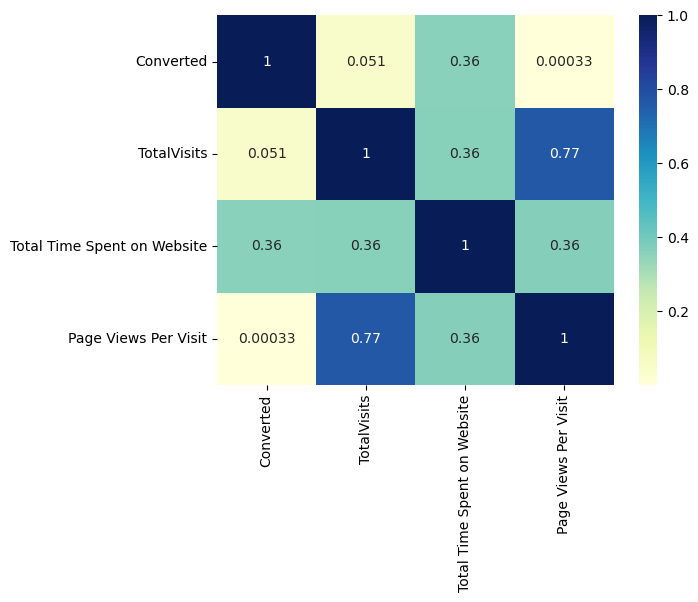

In [103]:
# ploting the heatmap of lead_data
sns.heatmap(lead_data.corr(),annot=True,cmap="YlGnBu")

Corelation between 'Total Visits' and 'Page Views Per Visit' is 0.77

## Data Preparation

In [104]:
# Unique values from each column in lead_data

for col in lead_data.columns:
    print("*********",col,"*******")
    print(lead_data[col].unique())
    print("                        ")

********* Prospect ID *******
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
                        
********* Lead Origin *******
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
                        
********* Lead Source *******
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'Welingak Website' 'Facebook' 'Others']
                        
********* Do Not Email *******
['No' 'Yes']
                        
********* Do Not Call *******
['No' 'Yes']
                        
********* Converted *******
[0 1]
                        
********* TotalVisits *******
[ 0.  5.  2.  1.  4.  8. 10.  6.  3.  7.  9.]
                        
********* Total Time Spent on Website *******
[   0  674 1532 ...  603  483  927]
                    

### 1) Converting some binary variables (Yes/No) to 1/0

In [105]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

### 2) Creating Dummy variables for the categorical features

In [106]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [107]:
# calculation number of unique values from each column
lead_data.nunique()

Prospect ID                        9074
Lead Origin                           4
Lead Source                           9
Do Not Email                          2
Do Not Call                           2
Converted                             2
TotalVisits                          11
Total Time Spent on Website        1717
Page Views Per Visit                 91
Last Activity                        11
Specialization                       19
What is your current occupation       6
City                                  6
Last Notable Activity                16
dtype: int64

dummy variables to be created for - 'Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','Last Notable Activity'

In [108]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity','Specialization',
                                       'What is your current occupation','City','Last Notable Activity']], drop_first=True,
                                       dtype = 'int')
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [109]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [110]:
#Dropping the columns for which dummies were created
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization',
                            'What is your current occupation','City','Last Notable Activity'], axis = 1)

In [111]:
lead_data.shape

(9074, 71)

### 2) Splitting the data into train and test set.

In [112]:
# Putting feature variable to X
X=lead_data.drop(['Prospect ID','Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [113]:
# Putting target variable to y
y=lead_data[['Converted']]
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [114]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [115]:
# Splitting the data into 70:30 for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [116]:
# printing shape of training data
print(X_train.shape)
print(y_train.shape)

(6351, 69)
(6351, 1)


In [117]:
# printing shape of testing data
print(X_test.shape)
print(y_test.shape)

(2723, 69)
(2723, 1)


### 3) Scaling the features

In [118]:
#importing the StandardScaler library
from sklearn.preprocessing import StandardScaler

In [119]:
# scaling the features using StandardScaler
scaler=StandardScaler()

In [120]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Do Not Email                                          9074 non-null   int64  
 2   Do Not Call                                           9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Lead Origin_Landing Page Submission                   9074 non-null   int32  
 8   Lead Origin_Lead Add Form                             9074

In [121]:
# Scaling numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [122]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,4.363276e-17,-2.908851e-17,2.153668e-17,0.535979,0.068651,0.003779,0.003936,0.320737,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.269581,0.017744,1.000079e+00,1.000079e+00,1.000079e+00,0.498743,0.252879,0.061362,0.062622,0.466797,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,-1.150329e+00,-8.886503e-01,-1.265540e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-7.915538e-01,-8.703028e-01,-7.102788e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-7.400339e-02,-4.354671e-01,-1.550176e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,6.435470e-01,8.002366e-01,5.834798e-01,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.437423e+00,3.195502e+00,2.066027e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

## Feature Selection Using RFE

In [123]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [124]:
# selecting 20 features using RFE

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [125]:
# Displaying dataframe which shows Feature (column), Whether it is selected for model building or not and its Rank
pd.set_option('display.max_rows', None)
rfe_df = pd.DataFrame({'Feature': X_train.columns, 'Select?': rfe.support_, 'Rank': rfe.ranking_})
rfe_df.sort_values(by='Rank')
rfe_df

,Feature,Select?,Rank
0,Do Not Email,True,1
1,Do Not Call,False,9
2,TotalVisits,False,21
3,Total Time Spent on Website,True,1
4,Page Views Per Visit,False,20
5,Lead Origin_Landing Page Submission,True,1
6,Lead Origin_Lead Add Form,True,1
7,Lead Origin_Lead Import,True,1
8,Lead Source_Facebook,False,24
9,Lead Source_Google,False,25


In [126]:
# Viewing columns selected by RFE
#assigning the selected features to a variable 'cols'
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Assessing the model with StatsModels

##### Model 1

In [127]:
# importing stats model api
import statsmodels.api as sm

In [128]:
# Adding constant variable and running the first model

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 21 Nov 2023   Deviance:                       5180.6
Time:                        12:42:49   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [129]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

##### Model 2

In [130]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 21 Nov 2023   Deviance:                       5184.5
Time:                        12:42:49   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [131]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

##### Model 3

In [132]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 21 Nov 2023   Deviance:                       5186.1
Time:                        12:42:49   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

Droping 'What is your current occupation_Student' for its high p value

In [133]:
col1=col1.drop('What is your current occupation_Student')

##### Model 4

In [134]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Tue, 21 Nov 2023   Deviance:                       5189.0
Time:                        12:42:49   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

Droping 'Lead Origin_Lead Add Form' for high p value

In [135]:
col1=col1.drop('Lead Origin_Lead Add Form')

##### Model 5

In [136]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Tue, 21 Nov 2023   Deviance:                       5192.3
Time:                        12:42:49   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

Droping 'Lead Origin_Lead Import' for high p value

In [137]:
col1=col1.drop('Lead Origin_Lead Import')

###### Model 6

In [138]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.7
Date:                Tue, 21 Nov 2023   Deviance:                       5195.5
Time:                        12:42:49   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4025
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4926      0.239      2.058      0.040       0.024       0.962
Do Not Email                                            -1.6821      0.191     -8.827      0.000      -2.056      -1.309
Total Time Spent on Website                              1.0975      0.040     27.191      0.000       1.018       1.177
Lead Origin_Landing Page Submission                     -1.1824      0.128     -9.266      0.000      -1.432      -0.932
Lead Source_Olark Chat                                   1.0855      0.123      8.857      0.000       0.845       1.326
Lead Source_Reference                                    3.3281      0.242     13.744      0.000       2.853       3.803
Lead Source_Welingak Website                             5.8665      0.729      8.042      0.000       4.437       7.296
Last Activity_Olark Chat Conversation                   -0.9572      0.172     -5.575      0.000      -1.294      -0.621
Last Activity_Other_Activity                             2.2163      0.462      4.792      0.000       1.310       3.123
Last Activity_SMS Sent                                   1.3399      0.076     17.708      0.000       1.192       1.488
Last Activity_Unsubscribed                               1.4034      0.482      2.910      0.004       0.458       2.348
Specialization_Others                                   -1.1865      0.125     -9.455      0.000      -1.432      -0.941
What is your current occupation_Unemployed              -0.5924      0.213     -2.781      0.005      -1.010      -0.175
What is your current occupation_Working Professional     2.0329      0.283      7.178      0.000       1.478       2.588
Last Notable Activity_Modified                          -0.8747      0.081    -10.743      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5623      0.475      3.287      0.001       0.631       2.494
========================================================================================================================
"""

### All p values are under 0.05, checking VIF

In [139]:
# Importing variance_inflation_factor from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a function to calculate variable_inflation_factor as it needs to be calculated multiple times
def vif_df(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif = vif.reset_index(drop=True)
    return vif

##### Checking for VIF values:

In [140]:
vif_df(X_train[col1])

,Features,VIF
0,What is your current occupation_Unemployed,9.56
1,Lead Origin_Landing Page Submission,5.67
2,Specialization_Others,3.98
3,Lead Source_Olark Chat,2.22
4,Last Notable Activity_Modified,1.86
5,What is your current occupation_Working Profes...,1.64
6,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
8,Lead Source_Reference,1.45
9,Total Time Spent on Website,1.31


Droping 'What is your current occupation_Unemployed' because of its high VIF 

In [141]:
col1=col1.drop('What is your current occupation_Unemployed')

##### Model 7

In [142]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 21 Nov 2023   Deviance:                       5203.0
Time:                        12:42:50   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

##### Checking for VIF values:

In [143]:
vif_df(X_train[col1])

,Features,VIF
0,Specialization_Others,2.17
1,Lead Source_Olark Chat,2.03
2,Last Notable Activity_Modified,1.79
3,Lead Origin_Landing Page Submission,1.70
4,Last Activity_Olark Chat Conversation,1.59
5,Last Activity_SMS Sent,1.57
6,Total Time Spent on Website,1.29
7,Lead Source_Reference,1.24
8,Do Not Email,1.21
9,What is your current occupation_Working Profes...,1.19


Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model 7 is our final model. We have 13 features in our final model.

## Model Evaluation

##### Making Prediction on the Train set

In [144]:
y_pred=res.predict(X_train_sm)

In [145]:
y_pred.head(10)

3009    0.192492
1012    0.107074
9226    0.329484
4750    0.866550
7987    0.802188
1281    0.745221
2880    0.097496
4971    0.965877
7536    0.851963
1248    0.772910
dtype: float64

Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

Creating new column 'Predicted' with 1 if Predicted_prob > 0.5 else 0

In [146]:
y_train_pred_final=pd.DataFrame(y_pred,columns=['Converted_prob'])
y_train_pred_final['Converted']=y_train['Converted']
y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final['Predicted']=np.where(y_train_pred_final['Converted_prob']>0.5,1,0)
#y_train_pred_final=y_train_pred_final.dropna

In [147]:
#first 10 raws
y_train_pred_final.head(10)

,Converted_prob,Converted,Prospect ID,Predicted
3009,0.192492,0,3009,0
1012,0.107074,0,1012,0
9226,0.329484,0,9226,0
4750,0.866550,1,4750,1
7987,0.802188,1,7987,1
1281,0.745221,1,1281,1
2880,0.097496,0,2880,0
4971,0.965877,1,4971,1
7536,0.851963,1,7536,1
1248,0.772910,0,1248,1


##### Making the Confusion matrix

In [148]:
#importing metrics from sklearn
from sklearn import metrics

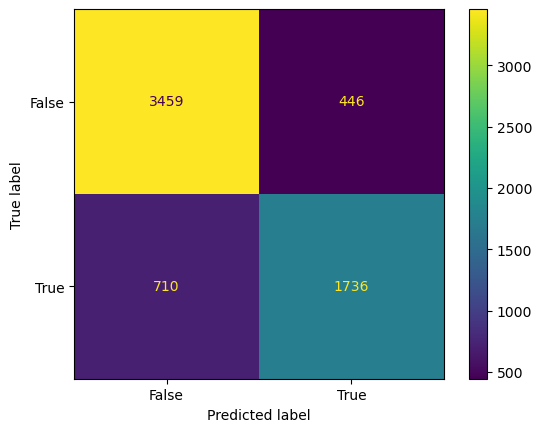

In [149]:
# plotting confusion matrix

confusion_matrix=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["Predicted"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True])
cm_display.plot()
plt.show()

In [150]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3459      446
# converted            710       1736 

In [151]:
# # Let's check the overall Accuracy, Sensitivity, Specificity
print('Accuracy=',metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted']))

Accuracy= 0.8179814202487797


In [152]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [153]:
# Sensitivity(also called Recall or True Positive Rate) of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7097301717089125


In [154]:
# Let us calculate specificity( also called teh 'True Negative Rate')
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.885787451984635


We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Plotting the ROC Curve

An ROC curve demonstrates several things:

. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)

. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

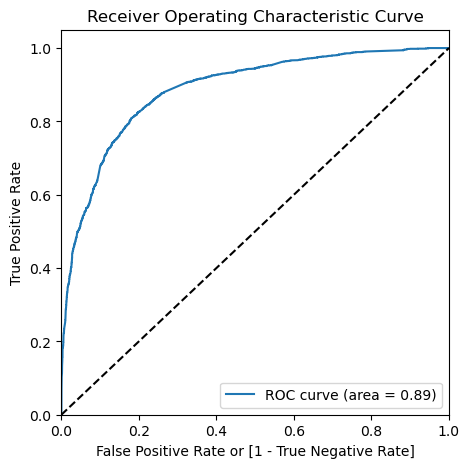

In [157]:
# plotting
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


#### Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

### Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that.

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [158]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_prob,Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0.192492,0,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0.107074,0,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0.329484,0,9226,0,1,1,1,1,0,0,0,0,0,0
4750,0.866550,1,4750,1,1,1,1,1,1,1,1,1,1,0
7987,0.802188,1,7987,1,1,1,1,1,1,1,1,1,1,0


In [159]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.591718  0.972200  0.353393
0.2   0.2  0.749488  0.915781  0.645327
0.3   0.3  0.800976  0.851594  0.769270
0.4   0.4  0.816249  0.775961  0.841485
0.5   0.5  0.817981  0.709730  0.885787
0.6   0.6  0.798614  0.602617  0.921383
0.7   0.7  0.786963  0.529027  0.948528
0.8   0.8  0.762557  0.427228  0.972599
0.9   0.9  0.722248  0.298446  0.987708


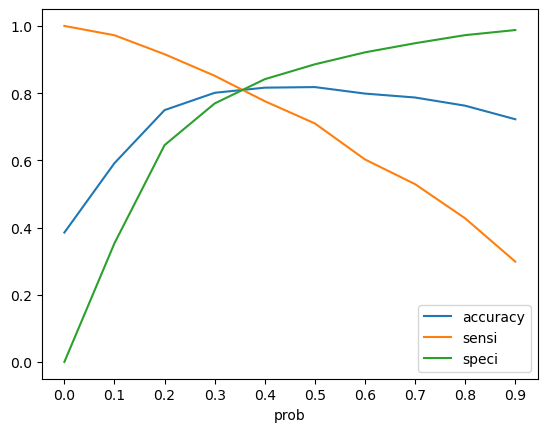

In [160]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(cutoff_df['prob'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability

#### Precision and recall tradeoff

In [161]:
# importing precision_recall_curve from sklearn.metrics
from sklearn.metrics import precision_recall_curve


In [162]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

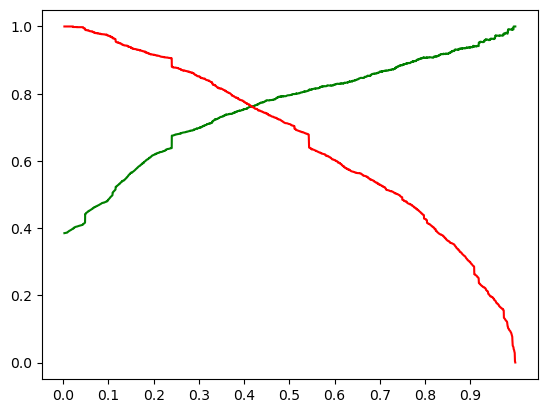

In [163]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.show()

The above graph shows the trade-off between the Precision and Recall to be 0.4

#### Assigning Lead Score to the Training data

In [164]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted_prob,Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score
3009,0.192492,0,3009,0,1,1,0,0,0,0,0,0,0,0,19
1012,0.107074,0,1012,0,1,1,0,0,0,0,0,0,0,0,11
9226,0.329484,0,9226,0,1,1,1,1,0,0,0,0,0,0,33
4750,0.866550,1,4750,1,1,1,1,1,1,1,1,1,1,0,87
7987,0.802188,1,7987,1,1,1,1,1,1,1,1,1,1,0,80


## Model Evaluation (after finding the optimum cutoff point)

###### Calcualting the matrix using the cut-off value of 0.34

In [165]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted_prob,Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score,final_predicted
3009,0.192492,0,3009,0,1,1,0,0,0,0,0,0,0,0,19,0
1012,0.107074,0,1012,0,1,1,0,0,0,0,0,0,0,0,11,0
9226,0.329484,0,9226,0,1,1,1,1,0,0,0,0,0,0,33,0
4750,0.866550,1,4750,1,1,1,1,1,1,1,1,1,1,0,87,1
7987,0.802188,1,7987,1,1,1,1,1,1,1,1,1,1,0,80,1


In [166]:
# Let's check the overall accuracy.
Accuracy_train=metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
Accuracy_train

0.8104235553456148

In [167]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
confusion2

array([[3143,  762],
       [ 442, 2004]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
Sensitivity_train=TP / (TP+FN)
Sensitivity_train

0.8192968111201963

In [170]:
# Let us calculate specificity
Specificity_train=TN / (TN+FP)
Specificity_train

0.804865556978233

In [171]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ (TN+FP))

False Positive rate :  0.19513444302176697


In [172]:
# Positive predictive value 
print("Positive Predictive Value :",TP / (TP+FP))

Positive Predictive Value : 0.7245119305856833


In [173]:
# Negative predictive value
print("Negative Predictive Value : ",TN / (TN+ FN))

Negative Predictive Value :  0.8767085076708507


### Precision and Recall

Precision: Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.

Recall: Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

###### Calculating the matrix using the cut-off value of 0.4

In [174]:
y_train_pred_final['final_predicted_PrecisionRecall'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.40 else 0)

y_train_pred_final.head()

,Converted_prob,Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score,final_predicted,final_predicted_PrecisionRecall
3009,0.192492,0,3009,0,1,1,0,0,0,0,0,0,0,0,19,0,0
1012,0.107074,0,1012,0,1,1,0,0,0,0,0,0,0,0,11,0,0
9226,0.329484,0,9226,0,1,1,1,1,0,0,0,0,0,0,33,0,0
4750,0.866550,1,4750,1,1,1,1,1,1,1,1,1,1,0,87,1,1
7987,0.802188,1,7987,1,1,1,1,1,1,1,1,1,1,0,80,1,1


In [175]:
# Confusion matrix
confusion3 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted_PrecisionRecall'])
confusion3

array([[3286,  619],
       [ 548, 1898]], dtype=int64)

In [176]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [177]:
# importing precision_score, recall_score

from sklearn.metrics import precision_score, recall_score

In [178]:
print("Precision :",precision_score(y_train_pred_final['Converted'] , y_train_pred_final['final_predicted_PrecisionRecall']))

Precision : 0.754072308303536


In [179]:
print("Recall :",recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted_PrecisionRecall']))

Recall : 0.7759607522485691


###### We are going with the cut-off value of 0.34 as it gives higher Recall value

In [180]:
y_train_pred_final.head(10)

,Converted_prob,Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score,final_predicted,final_predicted_PrecisionRecall
3009,0.192492,0,3009,0,1,1,0,0,0,0,0,0,0,0,19,0,0
1012,0.107074,0,1012,0,1,1,0,0,0,0,0,0,0,0,11,0,0
9226,0.329484,0,9226,0,1,1,1,1,0,0,0,0,0,0,33,0,0
4750,0.866550,1,4750,1,1,1,1,1,1,1,1,1,1,0,87,1,1
7987,0.802188,1,7987,1,1,1,1,1,1,1,1,1,1,0,80,1,1
1281,0.745221,1,1281,1,1,1,1,1,1,1,1,1,0,0,75,1,1
2880,0.097496,0,2880,0,1,0,0,0,0,0,0,0,0,0,10,0,0
4971,0.965877,1,4971,1,1,1,1,1,1,1,1,1,1,1,97,1,1
7536,0.851963,1,7536,1,1,1,1,1,1,1,1,1,1,0,85,1,1
1248,0.772910,0,1248,1,1,1,1,1,1,1,1,1,0,0,77,1,1


## Making predictions on the test set

### Scaling the test data

In [181]:
# applying scaling on numerical variable
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [182]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.591008,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.894051,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.743117,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.878732,0,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.578179,1,0,0,0,0,0,0,0,0,0,0,0


In [183]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]


3271    0.128005
1490    0.968549
7936    0.110497
4216    0.805698
3830    0.130945
1800    0.631051
6507    0.345697
4821    0.299301
4223    0.919132
4714    0.331894
dtype: float64

In [184]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [185]:
y_pred_1.head(10)

,0
3271,0.128005
1490,0.968549
7936,0.110497
4216,0.805698
3830,0.130945
1800,0.631051
6507,0.345697
4821,0.299301
4223,0.919132
4714,0.331894


In [186]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [187]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [188]:
y_test_df.head(10)

,Converted,Prospect ID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830
1800,1,1800
6507,0,6507
4821,0,4821
4223,1,4223
4714,0,4714


In [189]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [190]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [191]:
y_pred_final.head(10)

,Converted,Prospect ID,0
0,0,3271,0.128005
1,1,1490,0.968549
2,0,7936,0.110497
3,1,4216,0.805698
4,0,3830,0.130945
5,1,1800,0.631051
6,0,6507,0.345697
7,0,4821,0.299301
8,1,4223,0.919132
9,0,4714,0.331894


In [192]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [193]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [194]:
y_pred_final.head(10)

,Prospect ID,Converted,Converted_prob
0,3271,0,0.128005
1,1490,1,0.968549
2,7936,0,0.110497
3,4216,1,0.805698
4,3830,0,0.130945
5,1800,1,0.631051
6,6507,0,0.345697
7,4821,0,0.299301
8,4223,1,0.919132
9,4714,0,0.331894


In [195]:
# Calculating final_predicted with cutoff of 0.34
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [196]:
y_pred_final.head(10)

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.128005,0
1,1490,1,0.968549,1
2,7936,0,0.110497,0
3,4216,1,0.805698,1
4,3830,0,0.130945,0
5,1800,1,0.631051,1
6,6507,0,0.345697,1
7,4821,0,0.299301,0
8,4223,1,0.919132,1
9,4714,0,0.331894,0


In [197]:
# Let's check the overall accuracy.
Accuracy_test=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
Accuracy_test

0.803892765332354

In [198]:
# Making the confusion matrix
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1393,  341],
       [ 193,  796]], dtype=int64)

In [199]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [200]:
# Sensitivity of our logistic regression model
Sensitivity_test=TP/(TP+FN)
Sensitivity_test

0.8048533872598584

In [201]:
# specificity
Specificity_test=TN/(TN+FP)
Specificity_test

0.8033448673587081

#### Assigning Lead Score to the Testing data

In [202]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.128005,0,13
1,1490,1,0.968549,1,97
2,7936,0,0.110497,0,11
3,4216,1,0.805698,1,81
4,3830,0,0.130945,0,13


## Results :

#### 1) Comparing the values obtained for Train & Test:

In [203]:
print("Train Data:")

print("Accuracy:", round(Accuracy_train*100,2))

print("Sensitivity:",round(Sensitivity_train*100,2))

print("Specificity:",round(Specificity_train*100,2))

    
print("Test Data:")

print("Accuracy:",round(Accuracy_test*100,2))

print("Sensitivity:",round(Sensitivity_test*100,2))

print("Specificity:",round(Specificity_test*100,2)) 

Train Data:
Accuracy: 81.04
Sensitivity: 81.93
Specificity: 80.49
Test Data:
Accuracy: 80.39
Sensitivity: 80.49
Specificity: 80.33


From the results, we could conclude the target lead conversion rate to be around 80%.
The Model seems to predict the Conversion Rate very well and we should recomment to use the Lead Conversion Rate of 80%.

##### 2) Finding out the leads which should be contacted:
    
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 80. They can be termed as 'Hot Leads'.

In [204]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads.head(10)

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.968549,1,97
3,4216,1,0.805698,1,81
8,4223,1,0.919132,1,92
16,1946,1,0.925590,1,93
21,2461,1,0.992961,1,99
23,5822,1,0.998045,1,100
25,2684,1,0.998045,1,100
28,4959,0,0.815650,1,82
30,2010,1,0.982807,1,98
33,4062,1,0.993354,1,99


In [205]:
hot_leads.shape

(462, 5)

So there are 462 leads which can be contacted and have a high chance of getting converted.

###### The Prospect ID of the customers to be contacted are :

In [206]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 4959, 2010, 4062, 7696,
       9049, 1518, 4543, 4830, 4365, 6629, 3542, 7347, 2504, 7674, 8596,
       4003, 4963, 6947, 4807,  446,  789, 8372, 5805, 4478, 3758,  337,
       1561, 5367,  737, 9034, 2176, 3631, 6423, 8286, 4047, 7174, 4461,
       1436, 7552, 5173, 3932, 4080, 1475, 5785, 2860, 7253, 4297,  200,
       5490, 1995, 6532,  999, 4498, 5797, 8687,  831, 7653, 4149,   76,
       2018,  243, 6743, 3703, 3307, 4208, 3976, 5769, 1051, 4978, 1663,
       3288, 6557, 8976, 8959, 7521, 6177, 8282, 8213, 9063, 4462, 5292,
       6913, 6015, 1481,  785, 2985, 3265, 3285, 7433, 2460, 3384, 3685,
       3858, 3810, 2009, 8106,  373, 3055, 7417, 4179, 8076, 4994, 8568,
       7268, 4353, 6784, 6754, 7236, 5725, 2960, 7753, 3983, 4487,  802,
        358, 8745, 4455, 4717,  505, 8509, 6094, 4992, 7036, 2680, 7065,
        112, 6149, 7157, 3827, 7175, 1675, 6999, 5932, 5826, 8492, 4624,
       6499, 2481, 3439, 4612, 7468, 7129, 4793, 66

#### 3) Finding out the Important Features from our final model:

In [207]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.858769
Lead Source_Reference                                   3.340121
What is your current occupation_Working Professional    2.606375
Last Activity_Other_Activity                            2.198777
Last Notable Activity_Unreachable                       1.546980
Last Activity_Unsubscribed                              1.378366
Last Activity_SMS Sent                                  1.325023
Total Time Spent on Website                             1.097643
Lead Source_Olark Chat                                  1.091475
const                                                  -0.071692
Last Notable Activity_Modified                         -0.881599
Last Activity_Olark Chat Conversation                  -0.948539
Lead Origin_Landing Page Submission                    -1.186301
Specialization_Others                                  -1.198306
Do Not Email                                           -1.678278
dtype: float64

### Recommendations:

The company should make calls to the leads with below features to get high conversion rate
- coming from the lead sources "Welingak Websites" and "Reference".
- working professionals
- who spent "more time on the websites".
- whose last activity was SMS Sent
- whose last activity was "Olark Chat Conversation"

The company should not make calls to the leads with below features to get high conversion rate
-  whose lead origin is "Landing Page Submission"
-  whose Specialization mentioned "Others"
-  who chose the option of "Do not Email" as "yes" as they are not likely to get converted.